Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('taxi.csv')

In [3]:
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private                0  
1       18.802        25.217          Standard        private                1  
2        6.747         9.800           Economy        private                0  
3       -1.000        -1.000           Economy        private                1  
4       12.383        19.250           Economy        private                1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [5]:
data.describe(include='all')

offer_gk    weekday_key       hour_key      driver_gk  \
count   1.000000e+05  100000.000000  100000.000000  100000.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    5.662189e+05       3.159860      13.827790    3446.376360   
std     3.259360e+05       2.054222       7.306496    2038.738677   
min     4.000000e+00       0.000000       0.000000      14.000000   
25%     2.855552e+05       1.000000       8.000000    1421.000000   
50%     5.656715e+05       3.000000      16.000000    3506.500000   
75%     8.487198e+05       5.000000      20.000000    5242.000000   
max     1.130355e+06       6.000000      23.000000    6806.000000   

            order_gk  driver_latitude  driver_longitude  \
count   100000.00000    100000.000000     100000.000000   
unique           NaN              NaN               NaN   
top              NaN              NaN               NaN   
freq             NaN              NaN               NaN   
mean    460867.01291        55.700824         37.492292   
std     266064.98953         2.135903          1.454640   
min         18.00000        -1.000000         -1.000000   
25%     229178.50000        55.708651         37.413497   
50%     462420.00000        55.772904         37.533664   
75%     690894.00000        55.960667         37.624113   
max     920344.00000        56.174097         38.280547   

        origin_order_latitude  origin_order_longitude    distance_km  \
count           100000.000000           100000.000000  100000.000000   
unique                    NaN                     NaN            NaN   
top                       NaN                     NaN            NaN   
freq                      NaN                     NaN            NaN   
mean                55.772440               37.541637      18.393518   
std                  0.665985                0.467758      41.129296   
min                 -1.000000               -1.000000      -1.000000   
25%                 55.708032               37.407117      -1.000000   
50%                 55.772561               37.532537      10.411500   
75%                 55.962000               37.624358      30.665250   
max                 56.311121               38.243608    5234.283000   

         duration_min offer_class_group ride_type_desc  driver_response  
count   100000.000000            100000         100000    100000.000000  
unique            NaN                 9              4              NaN  
top               NaN           Economy        private              NaN  
freq              NaN             48335          91207              NaN  
mean        23.134841               NaN            NaN         0.492480  
std         33.890105               NaN            NaN         0.499946  
min         -1.000000               NaN            NaN         0.000000  
25%         -1.000000               NaN            NaN         0.000000  
50%         19.700000               NaN            NaN         0.000000  
75%         37.867000               NaN            NaN         1.000000  
max       3958.283000               NaN            NaN         1.000000

### Наблюдения:
* пустых значений (null) нет
* ширина/долгота - есть значения -1
* ширина/долгота - в последствии будем убирать - очень много различных значений
* distance_km - есть значения -1
* distance_km - есть макс значение очень сильно отличается от 75% квантиля
* duration_min - есть значения -1
* duration_min - есть макс значение очень сильно отличается от 75% квантиля
* offer_class_group - категориальный признак, посмотреть сколько их и как распределены
* offer_class_group - преобразовать с помощью LabelEncoder
* ride_type_desc - категориальный признак, посмотреть сколько их и как распределены
* ride_type_desc - преобразовать с помощью LabelEncoder
* driver_response - првоерить, что значения только 0 или 1
* offer_gk - будем убирать - очень много различных значений
* order_gk - будем убирать - очень много различных значений

In [6]:
data.driver_response.value_counts()

0    50752
1    49248
Name: driver_response, dtype: int64

#### Данные распределены хорошо - примерно одинаковое кол-во

### Наблюдения:
* пустых значений (null) нет
* ширина/долгота - есть значения -1
* ширина/долгота - в последствии будем убирать - очень много различных значений
* distance_km - есть значения -1
* distance_km - есть макс значение очень сильно отличается от 75% квантиля
* duration_min - есть значения -1
* duration_min - есть макс значение очень сильно отличается от 75% квантиля
* offer_class_group - категориальный признак, посмотреть сколько их и как распределены
* offer_class_group - преобразовать с помощью LabelEncoder
* ride_type_desc - категориальный признак, посмотреть сколько их и как распределены
* ride_type_desc - преобразовать с помощью LabelEncoder
* <s>driver_response - првоерить, что значения только 0 или 1</s>
* offer_gk - будем убирать - очень много различных значений
* order_gk - будем убирать - очень много различных значений

In [7]:
data.offer_class_group.value_counts()

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           225
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

In [8]:
data[data.offer_class_group == 'Test']

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
12092    849177            5        20       3763     83260        55.820917   
31035   1122239            3        23       6290    493264        55.959273   
43940    897797            5        20        591     83260        55.821477   
54657    954625            1        18        172    203179        55.823113   
65028   1039723            1        15       1916    357476        55.881810   
82848    990065            2        14       3371    325838        55.775556   
95758    159224            5        17       1126    392645        55.761183   
97311   1060685            3        23       6302    493264        55.964894   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
12092         37.650258              55.827038               37.660981   
31035         37.415073              55.962322               37.407117   
43940         37.611275              55.827038               37.660981   
54657         37.508883              55.829178               37.513307   
65028         37.654255              55.872580               37.668403   
82848         37.582864              55.773730               37.591352   
95758         37.657616              55.757251               37.659064   
97311         37.413532              55.962322               37.407117   

       distance_km  duration_min offer_class_group ride_type_desc  \
12092         -1.0          -1.0              Test            SMB   
31035         -1.0          -1.0              Test            SMB   
43940         -1.0          -1.0              Test            SMB   
54657         -1.0          -1.0              Test            SMB   
65028         -1.0          -1.0              Test            SMB   
82848         -1.0          -1.0              Test            SMB   
95758         -1.0          -1.0              Test            SMB   
97311         -1.0          -1.0              Test            SMB   

       driver_response  
12092                0  
31035                0  
43940                1  
54657                1  
65028                1  
82848                1  
95758                1  
97311                1

#### Очень смущает название Test - таких строк немного, удалим их все.

In [9]:
data = data[data.offer_class_group != 'Test']

In [10]:
data.offer_class_group.value_counts()

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           225
VIP+           29
Name: offer_class_group, dtype: int64

In [11]:
data[data.offer_class_group == 'VIP'].head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
16194    272922            5         7       2337    575103        55.674115   
16195    300724            3         8       2337    552511        55.758244   
16196    521272            2        16       2337    547765        55.740867   
16197    661189            3         9       2337    310784        55.733914   
16199     53092            5         7       2337    151890        55.732096   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
16194         37.524532              55.690189               37.539827   
16195         37.595790              55.747323               37.629043   
16196         37.603132              55.743107               37.610264   
16197         37.599556              55.726397               37.528393   
16199         37.604732              55.724562               37.574052   

       distance_km  duration_min offer_class_group ride_type_desc  \
16194        6.066        17.883               VIP        private   
16195     1228.398       908.683               VIP        private   
16196       -1.000        -1.000               VIP        private   
16197        8.147        19.667               VIP        private   
16199       37.982        43.650               VIP        private   

       driver_response  
16194                0  
16195                1  
16196                1  
16197                1  
16199                0

In [12]:
data[data.offer_class_group == 'VIP+'].head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
16198    118713            6        17       2337    481182        55.758519   
16203    295776            3        17       2337    172592        55.758360   
16211    162871            3        18       2337    793194        55.743621   
16220    157535            2        18       2337    775860        55.839074   
16225    536880            3        12       2337     44911        55.761900   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
16198         37.610488              55.757255               37.612775   
16203         37.609759              55.761144               37.599638   
16211         37.534058              55.747123               37.539036   
16220         37.481753              55.891605               37.423499   
16225         37.538803              55.774810               37.556245   

       distance_km  duration_min offer_class_group ride_type_desc  \
16198       -1.000        -1.000              VIP+        private   
16203       -1.000        -1.000              VIP+        private   
16211        6.943        18.217              VIP+        private   
16220       -1.000        -1.000              VIP+        private   
16225        6.468        14.350              VIP+        private   

       driver_response  
16198                1  
16203                1  
16211                1  
16220                1  
16225                1

In [13]:
data['offer_class_group'] = data.offer_class_group.str.replace('+', '')

In [14]:
data.offer_class_group.value_counts()

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           254
Name: offer_class_group, dtype: int64

#### По смыслу кажется, что можно объединить VIP и Premium, а Delivery, Kids и XL - в other

In [15]:
data['offer_class_group'] = data.offer_class_group.apply(lambda x: 'Premium' if x == 'VIP' or x == 'Premium' else x)

In [16]:
data.offer_class_group.value_counts()

Economy     48335
Standard    47288
Premium      2027
Delivery     1290
Kids          588
XL            464
Name: offer_class_group, dtype: int64

In [17]:
data['offer_class_group'] = data.offer_class_group.apply(lambda x: x if x == 'Economy' or x == 'Premium'\
                                                         or x == 'Standard' else 'Other class')

In [18]:
data.offer_class_group.value_counts()

Economy        48335
Standard       47288
Other class     2342
Premium         2027
Name: offer_class_group, dtype: int64

### Наблюдения:
* пустых значений (null) нет
* ширина/долгота - есть значения -1
* ширина/долгота - в последствии будем убирать - очень много различных значений
* distance_km - есть значения -1
* distance_km - есть макс значение очень сильно отличается от 75% квантиля
* duration_min - есть значения -1
* duration_min - есть макс значение очень сильно отличается от 75% квантиля
* <s>offer_class_group - категориальный признак, посмотреть сколько их и как распределены</s>
* offer_class_group - преобразовать с помощью LabelEncoder
* ride_type_desc - категориальный признак, посмотреть сколько их и как распределены
* ride_type_desc - преобразовать с помощью LabelEncoder
* <s>driver_response - првоерить, что значения только 0 или 1</s>
* offer_gk - будем убирать - очень много различных значений
* order_gk - будем убирать - очень много различных значений

In [19]:
data.ride_type_desc.value_counts()

private      91207
business      8533
affiliate      224
SMB             28
Name: ride_type_desc, dtype: int64

#### Тут очень неравномерно распределены данные, очень много private

In [20]:
data[data.ride_type_desc == 'affiliate']['distance_km'].unique()

array([-1.])

#### При ride_type_desc = affiliate расстояние (distance_km) составляет только -1 км. Довольно необычное поведение, уберем такие строки из данных.

In [21]:
data = data[data.ride_type_desc != 'affiliate']

In [22]:
data.ride_type_desc.value_counts()

private     91207
business     8533
SMB            28
Name: ride_type_desc, dtype: int64

#### Строк с типом SMB очень-очень мало - тоже их уберем

In [23]:
data = data[data.ride_type_desc != 'SMB']

In [24]:
data.shape

(99740, 14)

### Наблюдения:
* пустых значений (null) нет
* ширина/долгота - есть значения -1
* ширина/долгота - в последствии будем убирать - очень много различных значений
* distance_km - есть значения -1
* distance_km - есть макс значение очень сильно отличается от 75% квантиля
* duration_min - есть значения -1
* duration_min - есть макс значение очень сильно отличается от 75% квантиля
* <s>offer_class_group - категориальный признак, посмотреть сколько их и как распределены</s>
* offer_class_group - преобразовать с помощью LabelEncoder
* <s>ride_type_desc - категориальный признак, посмотреть сколько их и как распределены</s>
* ride_type_desc - преобразовать с помощью LabelEncoder
* <s>driver_response - првоерить, что значения только 0 или 1</s>
* offer_gk - будем убирать - очень много различных значений
* order_gk - будем убирать - очень много различных значений

In [25]:
data[(data.driver_latitude == -1) & (data.driver_longitude != -1)]

Empty DataFrame
Columns: [offer_gk, weekday_key, hour_key, driver_gk, order_gk, driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude, distance_km, duration_min, offer_class_group, ride_type_desc, driver_response]
Index: []

In [26]:
data[(data.driver_latitude != -1) & (data.driver_longitude == -1)]

Empty DataFrame
Columns: [offer_gk, weekday_key, hour_key, driver_gk, order_gk, driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude, distance_km, duration_min, offer_class_group, ride_type_desc, driver_response]
Index: []

In [27]:
data[(data.origin_order_latitude == -1) & (data.origin_order_longitude != -1)]

Empty DataFrame
Columns: [offer_gk, weekday_key, hour_key, driver_gk, order_gk, driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude, distance_km, duration_min, offer_class_group, ride_type_desc, driver_response]
Index: []

In [28]:
data[(data.origin_order_latitude != -1) & (data.origin_order_longitude == -1)]

Empty DataFrame
Columns: [offer_gk, weekday_key, hour_key, driver_gk, order_gk, driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude, distance_km, duration_min, offer_class_group, ride_type_desc, driver_response]
Index: []

#### Во-первых, широта и долгота всегда либо одновременно равны -1 либо нет.

In [29]:
data[(data.driver_latitude == -1) & (data.origin_order_latitude == -1)]

Empty DataFrame
Columns: [offer_gk, weekday_key, hour_key, driver_gk, order_gk, driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude, distance_km, duration_min, offer_class_group, ride_type_desc, driver_response]
Index: []

#### Во-вторых, нет случаев, чтобы и у водителя и у заказа широта/долгота были равны -1

In [30]:
data[(data.driver_latitude == -1)]

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
565      638186            5        14       6272    817074             -1.0   
2111     567790            1        12       6792    820788             -1.0   
2129     302376            1         1       6792    548327             -1.0   
2137     427612            6        21       6792     32158             -1.0   
2142     202875            6         3       6792    346671             -1.0   
...         ...          ...       ...        ...       ...              ...   
81694    698969            6         6       2470    862514             -1.0   
83631   1077757            1         7       5578     62551             -1.0   
85335     75929            5        14        468    776944             -1.0   
89970   1110601            6        13        259    135435             -1.0   
92814   1033564            5        13       4850    322984             -1.0   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
565                -1.0              55.908664               37.597781   
2111               -1.0              55.415361               37.898917   
2129               -1.0              55.415361               37.898917   
2137               -1.0              55.415361               37.898917   
2142               -1.0              55.415361               37.898917   
...                 ...                    ...                     ...   
81694              -1.0              55.699097               37.317988   
83631              -1.0              55.600737               37.539690   
85335              -1.0              55.387756               37.549058   
89970              -1.0              55.962322               37.407117   
92814              -1.0              55.996121               37.381657   

       distance_km  duration_min offer_class_group ride_type_desc  \
565         -1.000         -1.00          Standard       business   
2111        -1.000         -1.00          Standard       business   
2129        83.923         81.35          Standard       business   
2137        -1.000         -1.00          Standard       business   
2142        70.529         65.00          Standard       business   
...            ...           ...               ...            ...   
81694       41.576         43.55          Standard        private   
83631       -1.000         -1.00       Other class       business   
85335       -1.000         -1.00          Standard       business   
89970       -1.000         -1.00          Standard       business   
92814       -1.000         -1.00          Standard       business   

       driver_response  
565                  1  
2111                 1  
2129                 1  
2137                 1  
2142                 1  
...                ...  
81694                1  
83631                1  
85335                1  
89970                1  
92814                1  

[140 rows x 14 columns]

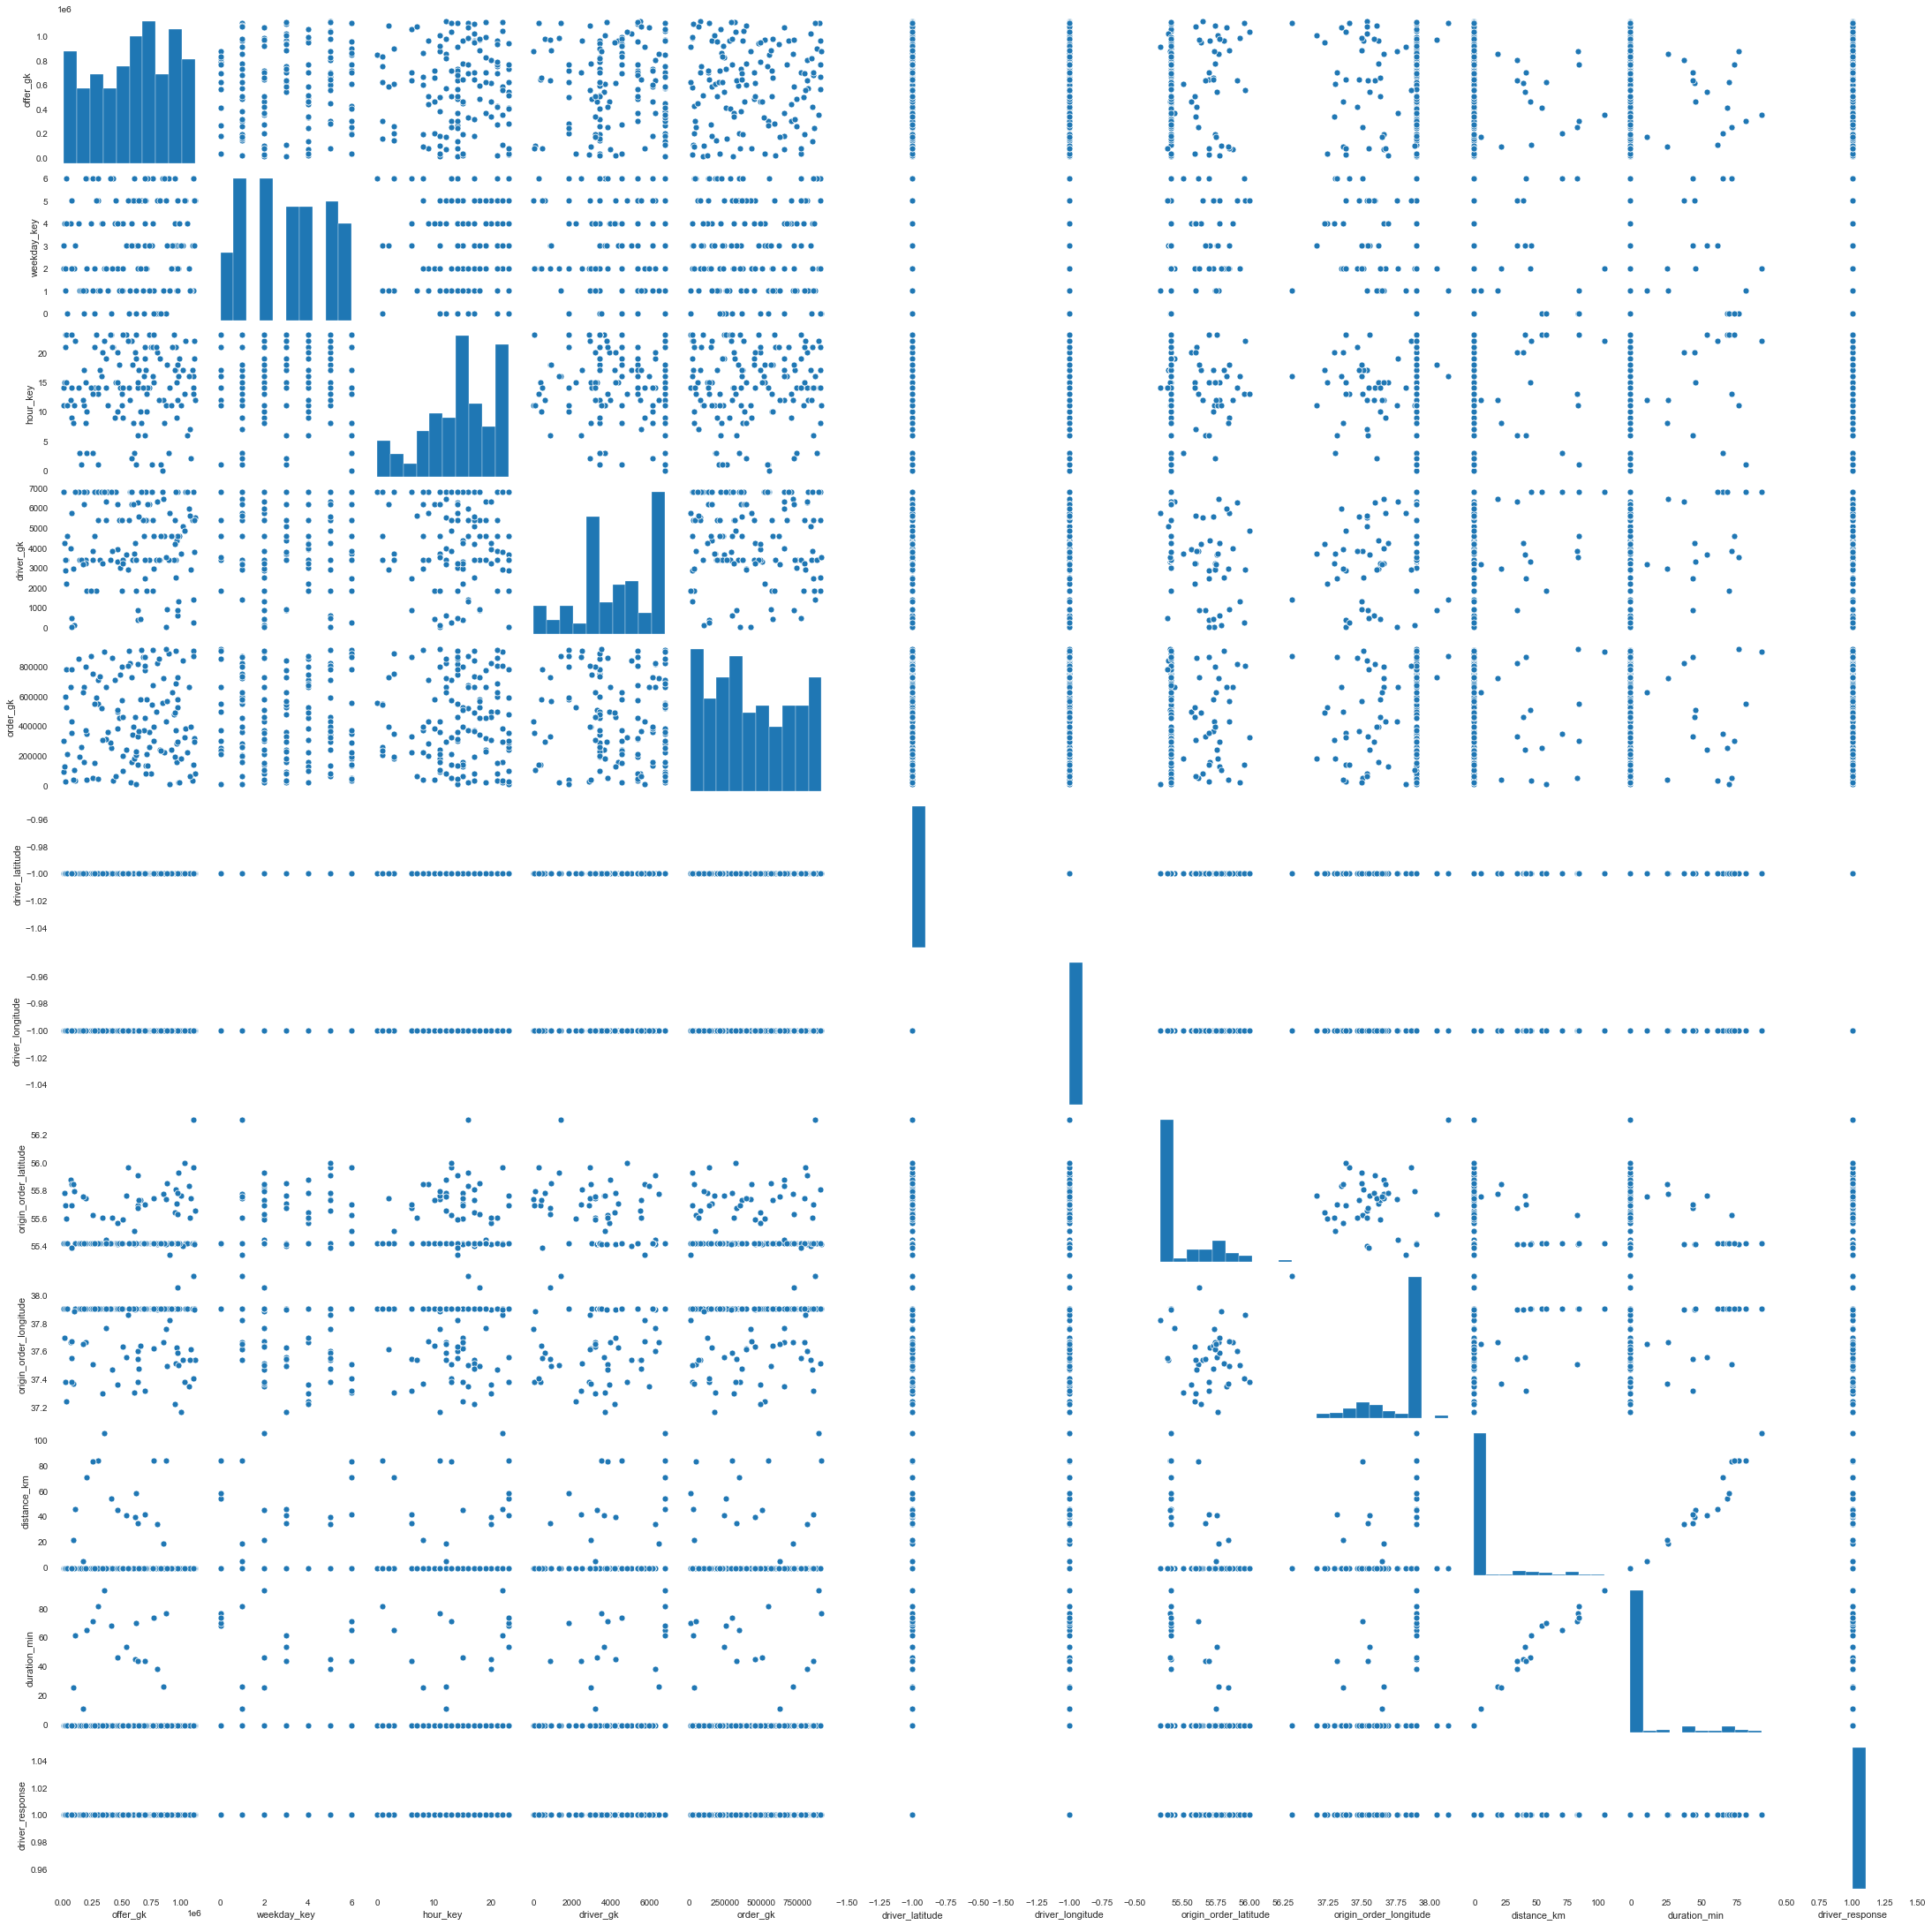

In [31]:
sns.pairplot(data[(data.driver_latitude == -1)].iloc[:,:14])

In [32]:
data[(data.driver_latitude == -1)].iloc[:,:14].driver_response.value_counts()

1    140
Name: driver_response, dtype: int64

In [33]:
data[(data.driver_latitude == -1)].iloc[:,:14].distance_km.value_counts()

-1.000      122
 83.872       1
 53.921       1
 83.491       1
 40.973       1
 21.160       1
 83.026       1
 34.004       1
 18.294       1
 105.126      1
 57.712       1
 39.508       1
 4.945        1
 41.576       1
 34.225       1
 83.923       1
 45.008       1
 45.879       1
 70.529       1
Name: distance_km, dtype: int64

#### Итак, при driver_latitude == -1 всегда овтет водителя - да и почти всегда расстояние = -1, при этом таких строк не очень много (140) - мы просто уберем их из данных.

In [34]:
data[(data.origin_order_latitude == -1)]

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
1687     760201            6        17       1479    217451        55.730637   
9407     729617            1        21       1835    404650        55.484133   
43328   1033378            3        10       5586    386108        55.762383   
43688    299807            3        18         14     69484        55.640164   
51365    833482            0        20         75    782429        55.619920   
56004   1009826            3        19       4185    247078        55.758792   
58769    212838            2         7       6304    542162        55.638462   
60245    753313            1        16       1168    583148        55.984804   
64117    936069            5        15        737    139197        55.753351   
64694   1095202            3        20       5669    659570        55.741113   
67170    638165            5        16       4567    354669        55.770791   
92696    599516            5        15       4850    376650        55.786988   
99178    531698            5        15       2442    139197        55.758865   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
1687          37.491326                   -1.0                    -1.0   
9407          37.850971                   -1.0                    -1.0   
43328         37.772572                   -1.0                    -1.0   
43688         37.534014                   -1.0                    -1.0   
51365         37.395172                   -1.0                    -1.0   
56004         37.749308                   -1.0                    -1.0   
58769         37.335678                   -1.0                    -1.0   
60245         37.159184                   -1.0                    -1.0   
64117         37.667157                   -1.0                    -1.0   
64694         37.618121                   -1.0                    -1.0   
67170         37.511972                   -1.0                    -1.0   
92696         37.615918                   -1.0                    -1.0   
99178         37.657849                   -1.0                    -1.0   

       distance_km  duration_min offer_class_group ride_type_desc  \
1687         2.942         6.300           Economy        private   
9407        -1.000        -1.000          Standard        private   
43328       14.127        21.433           Economy        private   
43688        9.998        22.133          Standard        private   
51365       28.607        32.967           Economy        private   
56004       11.281        21.167           Economy        private   
58769       48.557        47.300           Economy        private   
60245       -1.000        -1.000           Economy        private   
64117        2.252         7.400          Standard        private   
64694        7.199        20.200           Premium        private   
67170       13.997        27.717          Standard        private   
92696        3.504        12.517           Economy        private   
99178        2.252         7.400          Standard        private   

       driver_response  
1687                 1  
9407                 0  
43328                1  
43688                1  
51365                0  
56004                1  
58769                0  
60245                1  
64117                1  
64694                1  
67170                1  
92696                0  
99178                0

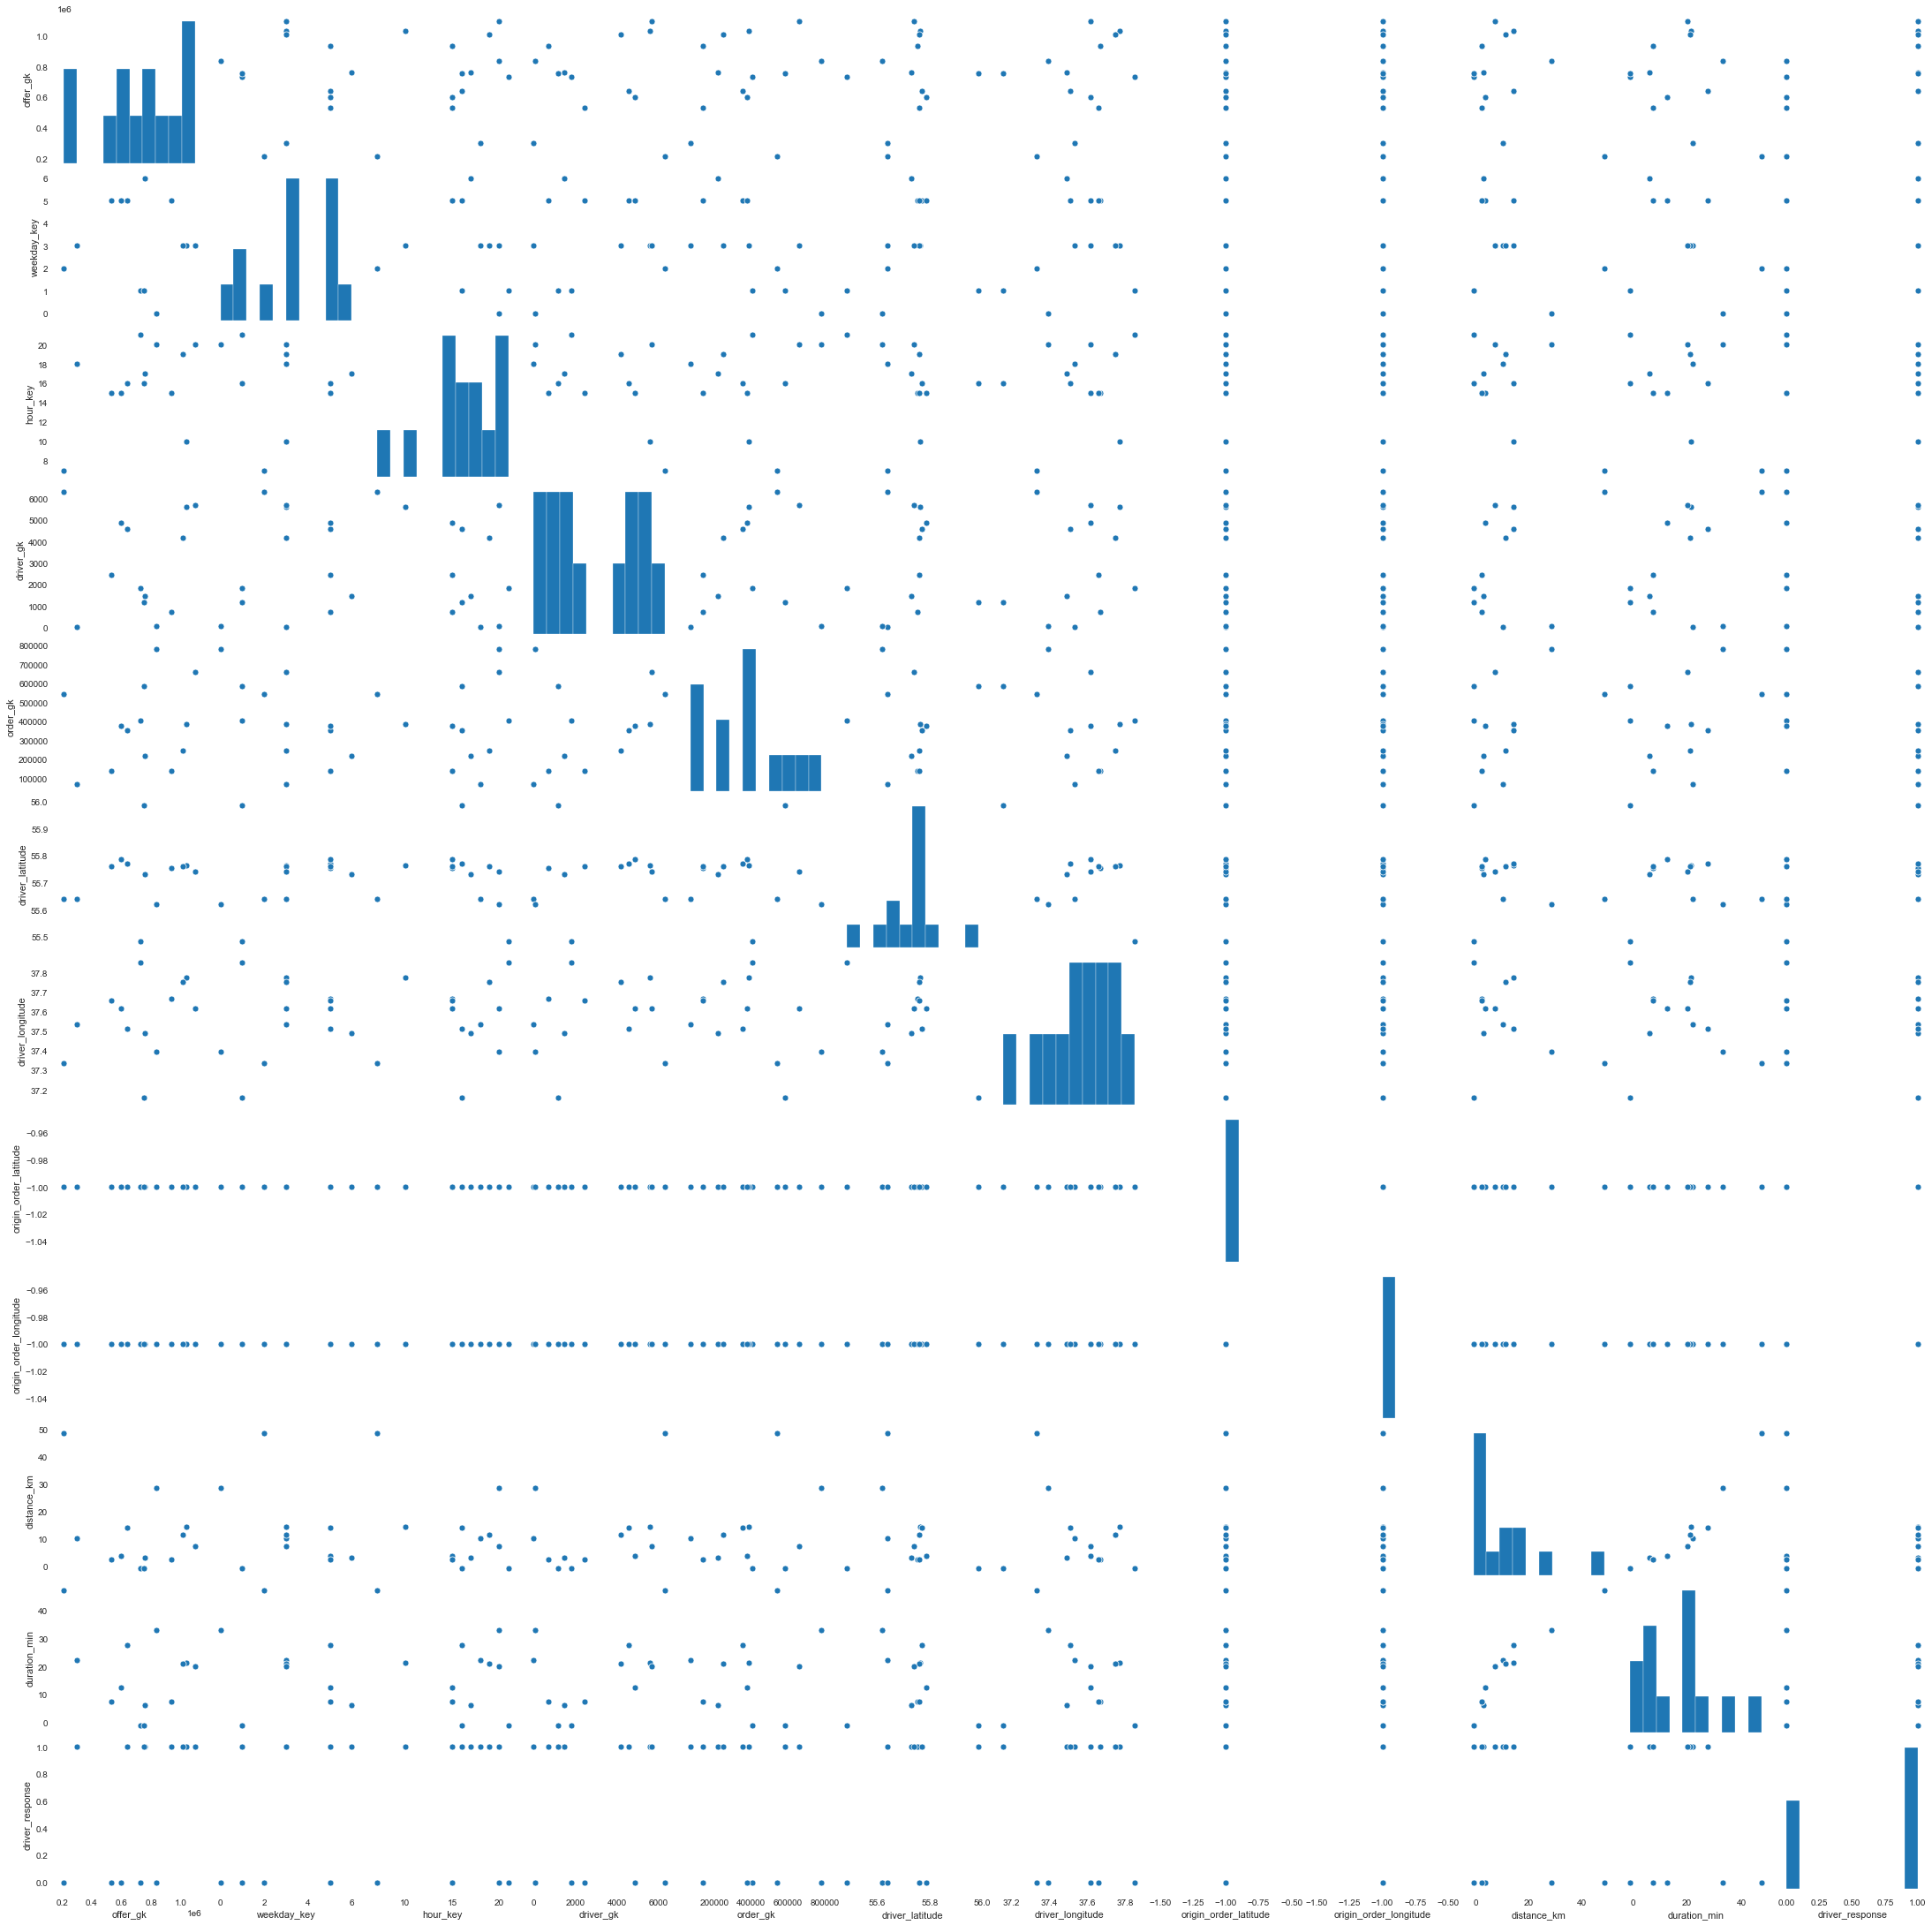

In [35]:
sns.pairplot(data[(data.origin_order_latitude == -1)].iloc[:,:14])

In [36]:
data[(data.origin_order_latitude == -1)].iloc[:,:14].driver_response.value_counts()

1    8
0    5
Name: driver_response, dtype: int64

In [37]:
data[(data.origin_order_latitude == -1)].iloc[:,:14].distance_km.value_counts()

 2.252     2
-1.000     2
 3.504     1
 2.942     1
 28.607    1
 9.998     1
 14.127    1
 48.557    1
 13.997    1
 11.281    1
 7.199     1
Name: distance_km, dtype: int64

#### Итак, при origin_order_latitude == -1 нет такого четкого разделения, как при driver_latitude, но значений всего 13, поэтому их тоже удалим.

In [38]:
data = data[data.driver_latitude != -1]

In [39]:
data = data[data.origin_order_latitude != -1]

In [40]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.958700e+04  99587.000000  99587.000000  99587.000000   99587.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661322e+05      3.158675     13.828361   3445.524536  460939.942292   
std     3.259249e+05      2.054605      7.309207   2038.608413  266057.890103   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854415e+05      1.000000      8.000000   1421.000000  229231.000000   
50%     5.654990e+05      3.000000     16.000000   3506.000000  462514.000000   
75%     8.486585e+05      5.000000     20.000000   5242.000000  691111.000000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99587.000000      99587.000000           99587.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780256         37.546328              55.780122   
std            0.234331          0.197030               0.156105   
min            0.000000          0.000000              55.327917   
25%           55.709275         37.413497              55.708492   
50%           55.772996         37.533953              55.772594   
75%           55.960700         37.624286              55.962043   
max           56.174097         38.280547              56.172361   

        origin_order_longitude   distance_km  duration_min offer_class_group  \
count             99587.000000  99587.000000  99587.000000             99587   
unique                     NaN           NaN           NaN                 4   
top                        NaN           NaN           NaN           Economy   
freq                       NaN           NaN           NaN             48292   
mean                 37.546388     18.457852     23.216046               NaN   
std                   0.159896     41.192594     33.923765               NaN   
min                  36.994072     -1.000000     -1.000000               NaN   
25%                  37.407117     -1.000000     -1.000000               NaN   
50%                  37.532457     10.492000     19.817000               NaN   
75%                  37.624181     30.762000     37.933000               NaN   
max                  38.243608   5234.283000   3958.283000               NaN   

       ride_type_desc  driver_response  
count           99587     99587.000000  
unique              2              NaN  
top           private              NaN  
freq            91184              NaN  
mean              NaN         0.491691  
std               NaN         0.499933  
min               NaN         0.000000  
25%               NaN         0.000000  
50%               NaN         0.000000  
75%               NaN         1.000000  
max               NaN         1.000000

#### Теперь у нас выскочили значения, где driver_latitude = 0, зато с origin_order_latitude все в порядке.

In [41]:
data[(data.driver_latitude == 0)]

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
55260    271817            0        14        771    306124              0.0   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
55260               0.0              55.410307               37.902451   

       distance_km  duration_min offer_class_group ride_type_desc  \
55260       43.726         55.45           Economy        private   

       driver_response  
55260                0

#### Всего одна строчка - тоже уберем.

In [42]:
data = data[data.driver_latitude != 0]

In [43]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.958600e+04  99586.000000  99586.000000  99586.000000   99586.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661352e+05      3.158707     13.828359   3445.551393  460941.496887   
std     3.259252e+05      2.054591      7.309244   2038.601031  266058.773625   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854462e+05      1.000000      8.000000   1421.000000  229230.000000   
50%     5.654995e+05      3.000000     16.000000   3506.000000  462514.000000   
75%     8.486588e+05      5.000000     20.000000   5242.000000  691111.000000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99586.000000      99586.000000           99586.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780817         37.546705              55.780126   
std            0.153842          0.157051               0.156102   
min           55.327636         36.984771              55.327917   
25%           55.709275         37.413497              55.708493   
50%           55.772996         37.533955              55.772594   
75%           55.960702         37.624286              55.962043   
max           56.174097         38.280547              56.172361   

        origin_order_longitude   distance_km  duration_min offer_class_group  \
count             99586.000000  99586.000000  99586.000000             99586   
unique                     NaN           NaN           NaN                 4   
top                        NaN           NaN           NaN           Economy   
freq                       NaN           NaN           NaN             48291   
mean                 37.546385     18.457598     23.215723               NaN   
std                   0.159893     41.192723     33.923782               NaN   
min                  36.994072     -1.000000     -1.000000               NaN   
25%                  37.407117     -1.000000     -1.000000               NaN   
50%                  37.532457     10.492000     19.817000               NaN   
75%                  37.624180     30.761500     37.933000               NaN   
max                  38.243608   5234.283000   3958.283000               NaN   

       ride_type_desc  driver_response  
count           99586     99586.000000  
unique              2              NaN  
top           private              NaN  
freq            91183              NaN  
mean              NaN         0.491696  
std               NaN         0.499934  
min               NaN         0.000000  
25%               NaN         0.000000  
50%               NaN         0.000000  
75%               NaN         1.000000  
max               NaN         1.000000

#### Похоже, что -1 это значение, когда данных не было. Попробуем построить корреляцию, а затем заменить на среднее для этого водителя для этого дня и часа

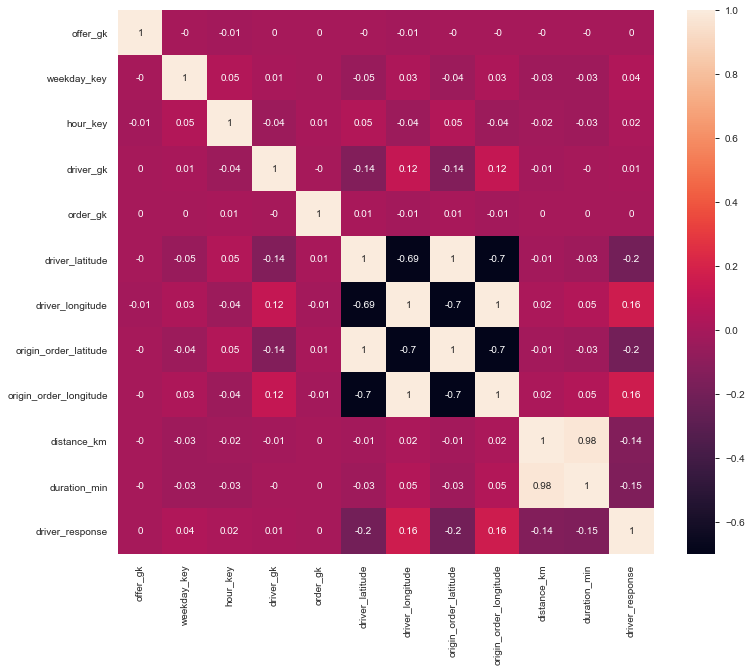

In [44]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [45]:
driver_stat = data[data.distance_km > 0].groupby(['driver_gk', 'weekday_key', 'hour_key'])\
['distance_km', 'duration_min'].mean().reset_index()

/Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [46]:
driver_stat.head()

driver_gk  weekday_key  hour_key  distance_km  duration_min
0         14            0         0      22.8845       39.5250
1         14            0         1       3.6750       10.2170
2         14            0         9       4.1620       11.3330
3         14            0        12       4.9650       16.1085
4         14            0        13      73.1870       79.6830

In [47]:
data = data.merge(driver_stat, how='left', left_on=['driver_gk', 'weekday_key', 'hour_key'],\
           right_on=['driver_gk', 'weekday_key', 'hour_key'])

In [48]:
data.shape

(99586, 16)

In [49]:
data.columns

Index(['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km_x', 'duration_min_x',
       'offer_class_group', 'ride_type_desc', 'driver_response',
       'distance_km_y', 'duration_min_y'],
      dtype='object')

In [50]:
data.columns = ['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km', 'duration_min',
       'offer_class_group', 'ride_type_desc', 'driver_response'\
                , 'distance_km_avg_day_hour', 'duration_min_avg_day_hour']

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99586 entries, 0 to 99585
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   offer_gk                   99586 non-null  int64  
 1   weekday_key                99586 non-null  int64  
 2   hour_key                   99586 non-null  int64  
 3   driver_gk                  99586 non-null  int64  
 4   order_gk                   99586 non-null  int64  
 5   driver_latitude            99586 non-null  float64
 6   driver_longitude           99586 non-null  float64
 7   origin_order_latitude      99586 non-null  float64
 8   origin_order_longitude     99586 non-null  float64
 9   distance_km                99586 non-null  float64
 10  duration_min               99586 non-null  float64
 11  offer_class_group          99586 non-null  object 
 12  ride_type_desc             99586 non-null  object 
 13  driver_response            99586 non-null  int

#### Видно, что для нкоторых водителей не нашлось подходящего среднего (null):

In [52]:
data[data.distance_km_avg_day_hour.isna()]

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
76       434648            2         5       6080    901138        55.843690   
204      252353            1        10       6080    729169        55.752685   
235      699955            1        10       6080    140909        55.773867   
271      747482            1        10       6080    445275        55.781937   
309       65903            1        20       3016    420076        55.775916   
...         ...          ...       ...        ...       ...              ...   
96941    610275            4        14       6302    411425        55.790917   
97177    185256            6         6       6302    390315        55.899521   
98260   1102428            1        12       2442    797046        55.805844   
98525    149375            5        12       2442    116988        55.806006   
98654    323935            1        16       2442    608790        55.777769   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
76            37.356185              55.838139               37.392250   
204           37.585663              55.746982               37.560417   
235           37.525407              55.777098               37.519695   
271           37.535063              55.782573               37.531801   
309           37.588841              55.773746               37.592083   
...                 ...                    ...                     ...   
96941         37.534136              55.797155               37.518168   
97177         37.401139              55.908293               37.393747   
98260         37.723038              55.813040               37.720258   
98525         37.722800              55.798489               37.726938   
98654         37.689837              55.774925               37.684191   

       distance_km  duration_min offer_class_group ride_type_desc  \
76            -1.0          -1.0          Standard        private   
204           -1.0          -1.0          Standard       business   
235           -1.0          -1.0          Standard        private   
271           -1.0          -1.0           Economy       business   
309           -1.0          -1.0          Standard       business   
...            ...           ...               ...            ...   
96941         -1.0          -1.0          Standard        private   
97177         -1.0          -1.0          Standard        private   
98260         -1.0          -1.0          Standard        private   
98525         -1.0          -1.0          Standard        private   
98654         -1.0          -1.0          Standard        private   

       driver_response  distance_km_avg_day_hour  duration_min_avg_day_hour  
76                   1                       NaN                        NaN  
204                  1                       NaN                        NaN  
235                  1                       NaN                        NaN  
271                  1                       NaN                        NaN  
309                  1                       NaN                        NaN  
...                ...                       ...                        ...  
96941                0                       NaN                        NaN  
97177                0                       NaN                        NaN  
98260                0                       NaN                        NaN  
98525                0                       NaN                        NaN  
98654                0                       NaN                        NaN  

[5718 rows x 16 columns]

#### Для них попробуем найти среднее по дню недели

In [53]:
driver_stat_day = data[data.distance_km > 0].groupby(['driver_gk', 'weekday_key'])\
['distance_km', 'duration_min'].mean().reset_index()

/Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [54]:
driver_stat_day.head()

driver_gk  weekday_key  distance_km  duration_min
0         14            0    25.782667     34.984750
1         14            1     6.589000     15.075000
2         14            2    10.811353     22.508118
3         14            3     7.494687     14.672937
4         14            4    13.175667     23.739000

In [55]:
driver_stat_day.columns = ['driver_gk', 'weekday_key', 'distance_km_avg_day', 'duration_min_avg_day']

In [56]:
data = \
data.merge(driver_stat_day, how='left', left_on=['driver_gk', 'weekday_key'],\
           right_on=['driver_gk', 'weekday_key'])

In [57]:
data.shape

(99586, 18)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99586 entries, 0 to 99585
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   offer_gk                   99586 non-null  int64  
 1   weekday_key                99586 non-null  int64  
 2   hour_key                   99586 non-null  int64  
 3   driver_gk                  99586 non-null  int64  
 4   order_gk                   99586 non-null  int64  
 5   driver_latitude            99586 non-null  float64
 6   driver_longitude           99586 non-null  float64
 7   origin_order_latitude      99586 non-null  float64
 8   origin_order_longitude     99586 non-null  float64
 9   distance_km                99586 non-null  float64
 10  duration_min               99586 non-null  float64
 11  offer_class_group          99586 non-null  object 
 12  ride_type_desc             99586 non-null  object 
 13  driver_response            99586 non-null  int

#### Видно, что для нкоторых водителей не нашлось подходящего среднего (null):

In [59]:
data[data.distance_km_avg_day.isna()]

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
14854    373001            2        18       2401    796760        55.811762   
14855    473606            2        13       2401    820777        55.972380   
14890     14730            2        16       2401    811178        55.804532   
14896    533058            2         0       2401    524674        55.877280   
37334    693308            3        13       6666    739073        55.762043   
49201    782797            4         0       3394    154876        55.682053   
49210    830697            4         0       3394    278261        55.764040   
49222    336242            4         3       3394    677592        55.742878   
49236    682912            4         1       3394    649331        55.740973   
51742    112611            3         4       6405    821210        55.962174   
51745    591568            3         4       6405    504637        55.964237   
56662    127914            4         3       5613    616845        55.756929   
56713    889988            4         2       5613     44201        55.756951   
63716    421997            1         2       5620    835500        55.750850   
63749    527439            1         0       5620     99639        55.734397   
63757     19358            1        22       5620    525302        55.723237   
63767     78076            1         3       5620    336023        55.750863   
63771    957573            1         0       5620    326135        55.775492   
64449    660974            4        19       3751    810304        55.802349   
64495    818932            2        16       5955     95288        55.824958   
64496    963022            2        16       5955    522446        55.824933   
64497    280492            2        10       5955    298651        55.824545   
64537     85317            2        18       5955    176073        55.756657   
64546   1045816            2        19       5955     47677        55.739423   
65905    267970            0        12        426    508852        55.689232   
66678    643614            3         6         98    463512        55.662546   
66701   1114822            3         4         98    568706        55.575821   
68748    272527            0        13       1316    780061        55.787172   
68769    582952            0        13       1316    161307        55.782690   
76610    962669            3         0       2203     15630        55.780788   
77626    499536            3         1       2063    473314        55.962324   
77959   1128557            3         0       3670    807900        55.788935   
78324     41306            4        20       3235    651312        55.771348   
78352    783479            4         1       3235    912828        55.679758   
78382    712429            4        19       3235    298963        55.783325   
82869    169904            1        20       2628    305096        55.419198   
82882    214727            3        21       2628    867157        55.442081   
82901    712213            3        21       2628    116811        55.419497   
82917   1119507            3        22       2628    542902        55.715282   
82923    125150            1         5       2628    686941        55.414728   
82932    457280            3        23       2628    256227        55.419465   
86482   1069527            3        14        277    538917        55.745690   
90901    560369            1        22       3375     95142        55.559425   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
14854         37.128128              55.798912               37.153070   
14855         37.413992              55.962322               37.407117   
14890         37.297540              55.810704               37.323938   
14896         37.736187              55.891849               37.745235   
37334         37.594207              55.761820               37.617578   
49201         37.768222              55.65

#### Для них попробуем найти среднее по водителю

In [60]:
driver_stat_all = data[data.distance_km > 0].groupby(['driver_gk'])\
['distance_km', 'duration_min'].mean().reset_index()

/Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [61]:
driver_stat_all.head()

driver_gk  distance_km  duration_min
0         14    14.070242     23.141467
1         22    10.425015     17.562455
2         42    14.697655     23.586986
3         51    13.268484     22.991229
4         75    25.556893     31.456988

In [62]:
driver_stat_all.columns = ['driver_gk', 'distance_km_avg_all', 'duration_min_avg_all']

In [63]:
data = \
data.merge(driver_stat_all, how='left', left_on=['driver_gk'],\
           right_on=['driver_gk'])

In [64]:
data.shape

(99586, 20)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99586 entries, 0 to 99585
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   offer_gk                   99586 non-null  int64  
 1   weekday_key                99586 non-null  int64  
 2   hour_key                   99586 non-null  int64  
 3   driver_gk                  99586 non-null  int64  
 4   order_gk                   99586 non-null  int64  
 5   driver_latitude            99586 non-null  float64
 6   driver_longitude           99586 non-null  float64
 7   origin_order_latitude      99586 non-null  float64
 8   origin_order_longitude     99586 non-null  float64
 9   distance_km                99586 non-null  float64
 10  duration_min               99586 non-null  float64
 11  offer_class_group          99586 non-null  object 
 12  ride_type_desc             99586 non-null  object 
 13  driver_response            99586 non-null  int

In [67]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.958600e+04  99586.000000  99586.000000  99586.000000   99586.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661352e+05      3.158707     13.828359   3445.551393  460941.496887   
std     3.259252e+05      2.054591      7.309244   2038.601031  266058.773625   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854462e+05      1.000000      8.000000   1421.000000  229230.000000   
50%     5.654995e+05      3.000000     16.000000   3506.000000  462514.000000   
75%     8.486588e+05      5.000000     20.000000   5242.000000  691111.000000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99586.000000      99586.000000           99586.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780817         37.546705              55.780126   
std            0.153842          0.157051               0.156102   
min           55.327636         36.984771              55.327917   
25%           55.709275         37.413497              55.708493   
50%           55.772996         37.533955              55.772594   
75%           55.960702         37.624286              55.962043   
max           56.174097         38.280547              56.172361   

        origin_order_longitude   distance_km  duration_min offer_class_group  \
count             99586.000000  99586.000000  99586.000000             99586   
unique                     NaN           NaN           NaN                 4   
top                        NaN           NaN           NaN           Economy   
freq                       NaN           NaN           NaN             48291   
mean                 37.546385     18.457598     23.215723               NaN   
std                   0.159893     41.192723     33.923782               NaN   
min                  36.994072     -1.000000     -1.000000               NaN   
25%                  37.407117     -1.000000     -1.000000               NaN   
50%                  37.532457     10.492000     19.817000               NaN   
75%                  37.624180     30.761500     37.933000               NaN   
max                  38.243608   5234.283000   3958.283000               NaN   

       ride_type_desc  driver_response  distance_km_avg_day_hour  \
count           99586     99586.000000              93868.000000   
unique              2              NaN                       NaN   
top           private              NaN                       NaN   
freq            91183              NaN                       NaN   
mean              NaN         0.491696                 25.405750   
std               NaN         0.499934                 43.661343   
min               NaN         0.000000                  0.020000   
25%               NaN         0.000000                 10.435400   
50%               NaN         0.000000                 19.909000   
75%               NaN         1.000000                 38.457171   
max               NaN         1.000000               5234.283000   

        duration_min_avg_day_hour  distance_km_avg_day  duration_min_avg_day  \
count                93868.000000         99543.000000          99543.000000   
unique                        NaN                  NaN                   NaN   
top                           NaN                  NaN                   NaN   
freq                          NaN                  NaN                   NaN   
mean                    31.813382           

####  Отлично! Пустых значений не осталось, можно заменять. Заменять будем по следующему правилу - оригинальное значение ->  среднее за день + час -> среднее за день

In [78]:
data['distance_km_final'] = data.distance_km.replace(-1, np.NaN)\
.fillna(data.distance_km_avg_day_hour.fillna(data.distance_km_avg_day.fillna(data.distance_km_avg_all)))
data['duration_min_final'] = data.duration_min.replace(-1, np.NaN)\
.fillna(data.duration_min_avg_day_hour.fillna(data.duration_min_avg_day.fillna(data.duration_min_avg_all)))

In [74]:
data[(data.distance_km_avg_day_hour.isna()) & (data.distance_km > 0)]

Empty DataFrame
Columns: [offer_gk, weekday_key, hour_key, driver_gk, order_gk, driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude, distance_km, duration_min, offer_class_group, ride_type_desc, driver_response, distance_km_avg_day_hour, duration_min_avg_day_hour, distance_km_avg_day, duration_min_avg_day, distance_km_avg_all, duration_min_avg_all, distance_km_final, duration_km_final]
Index: []

[0 rows x 22 columns]

In [76]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.958600e+04  99586.000000  99586.000000  99586.000000   99586.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661352e+05      3.158707     13.828359   3445.551393  460941.496887   
std     3.259252e+05      2.054591      7.309244   2038.601031  266058.773625   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854462e+05      1.000000      8.000000   1421.000000  229230.000000   
50%     5.654995e+05      3.000000     16.000000   3506.000000  462514.000000   
75%     8.486588e+05      5.000000     20.000000   5242.000000  691111.000000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99586.000000      99586.000000           99586.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780817         37.546705              55.780126   
std            0.153842          0.157051               0.156102   
min           55.327636         36.984771              55.327917   
25%           55.709275         37.413497              55.708493   
50%           55.772996         37.533955              55.772594   
75%           55.960702         37.624286              55.962043   
max           56.174097         38.280547              56.172361   

        origin_order_longitude   distance_km  ...  ride_type_desc  \
count             99586.000000  99586.000000  ...           99586   
unique                     NaN           NaN  ...               2   
top                        NaN           NaN  ...         private   
freq                       NaN           NaN  ...           91183   
mean                 37.546385     18.457598  ...             NaN   
std                   0.159893     41.192723  ...             NaN   
min                  36.994072     -1.000000  ...             NaN   
25%                  37.407117     -1.000000  ...             NaN   
50%                  37.532457     10.492000  ...             NaN   
75%                  37.624180     30.761500  ...             NaN   
max                  38.243608   5234.283000  ...             NaN   

       driver_response distance_km_avg_day_hour  duration_min_avg_day_hour  \
count     99586.000000             93868.000000               93868.000000   
unique             NaN                      NaN                        NaN   
top                NaN                      NaN                        NaN   
freq               NaN                      NaN                        NaN   
mean          0.491696                25.405750                  31.813382   
std           0.499934                43.661343                  33.433005   
min           0.000000                 0.020000                   0.083000   
25%           0.000000                10.435400                  19.269143   
50%           0.000000                19.909000                  29.636281   
75%           1.000000                38.457171                  41.840625   
max           1.000000              5234.283000                3958.283000   

        distance_km_avg_day  duration_min_avg_day  distance_km_avg_all  \
count          99543.000000          99543.000000         99586.000000   
unique                  NaN                   NaN                  NaN   
top                     NaN                   NaN                  NaN   
freq                    NaN                   NaN                  NaN   
mean              24.985189             31.474051            24.977767   
std         

#### Появились нулевые значения (раньше их не видели, потому что были -1) - их не очень много, тоже уберем.

In [83]:
pd.set_option('display.max_columns', 30)
data[data.distance_km_final == 0]

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
851      346101            4        12       4215     70206        55.758458   
1171     166480            5         8       1706    234100        55.787066   
2408     839922            3        12       6792    845047        55.415367   
2875     904433            5        18       1514    228992        55.681763   
3311     149416            4         6       4269    401598        55.961844   
...         ...          ...       ...        ...       ...              ...   
97370    891112            0        23       6302    240143        55.964894   
98434   1076090            1         0       2442    607562        55.961366   
98866    325512            4        23       2442    690788        55.961371   
99523    213143            1         0       2442    378241        55.961366   
99578   1021230            1         1       2442    351741        55.961301   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
851           37.710545              55.747802               37.715600   
1171          37.563235              55.792505               37.563787   
2408          37.898310              55.410307               37.902451   
2875          37.480773              55.671333               37.464131   
3311          37.409798              55.961995               37.406355   
...                 ...                    ...                     ...   
97370         37.413532              55.962322               37.407117   
98434         37.413864              55.962322               37.407117   
98866         37.413497              55.962322               37.407117   
99523         37.413864              55.962322               37.407117   
99578         37.413497              55.966694               37.415754   

       distance_km  duration_min offer_class_group ride_type_desc  \
851            0.0           0.0           Economy        private   
1171           0.0           0.0           Economy        private   
2408           0.0           0.0          Standard        private   
2875           0.0           0.0          Standard        private   
3311           0.0           0.0           Economy        private   
...            ...           ...               ...            ...   
97370          0.0           0.0          Standard        private   
98434          0.0           0.0          Standard        private   
98866          0.0           0.0          Standard        private   
99523          0.0           0.0           Economy        private   
99578          0.0           0.0          Standard        private   

       driver_response  distance_km_avg_day_hour  duration_min_avg_day_hour  \
851                  1                  2.780000                   7.500000   
1171                 1                  9.799200                  16.403400   
2408                 1                 12.218000                  14.600000   
2875                 0                 13.122333                  21.934400   
3311                 0                       NaN                        NaN   
...                ...                       ...                        ...   
97370                0                 35.030026                  39.179342   
98434                0                 39.206932                  42.594492   
98866                0                 42.689020                  45.430653   
99523                0                 39.206932                  42.594492   
99578                0                 34.605900                  38.080425   

       distance_km_avg_day  duration_min_avg_day  distance_km_avg_all  \
851              13.781234             22.624191            14.457387   
1171             12.013158             20.204368            13.314406   
2408             45.530000             50.327846            37.028998   
2875             11.423040             20.136670            13.263656   
3311          

In [84]:
data = data[data.distance_km != 0]

In [85]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk      order_gk  \
count   9.943400e+04  99434.000000  99434.000000  99434.000000   99434.00000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    5.661204e+05      3.158819     13.830792   3445.517067  460938.16437   
std     3.259380e+05      2.054491      7.308187   2038.859766  266072.31176   
min     4.000000e+00      0.000000      0.000000     14.000000      18.00000   
25%     2.854052e+05      1.000000      8.000000   1421.000000  229183.00000   
50%     5.654405e+05      3.000000     16.000000   3506.000000  462559.00000   
75%     8.486612e+05      5.000000     20.000000   5242.000000  691165.50000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.00000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99434.000000      99434.000000           99434.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780826         37.546657              55.780135   
std            0.153845          0.157033               0.156103   
min           55.327636         36.984771              55.327917   
25%           55.709276         37.413497              55.708497   
50%           55.773002         37.533939              55.772594   
75%           55.960707         37.624264              55.962046   
max           56.174097         38.280547              56.172361   

        origin_order_longitude   distance_km  duration_min offer_class_group  \
count             99434.000000  99434.000000  99434.000000             99434   
unique                     NaN           NaN           NaN                 4   
top                        NaN           NaN           NaN           Economy   
freq                       NaN           NaN           NaN             48226   
mean                 37.546340     18.485813     23.251212               NaN   
std                   0.159872     41.217869     33.937546               NaN   
min                  36.994072     -1.000000     -1.000000               NaN   
25%                  37.407117     -1.000000     -1.000000               NaN   
50%                  37.532446     10.520000     19.850000               NaN   
75%                  37.624151     30.799000     37.967000               NaN   
max                  38.243608   5234.283000   3958.283000               NaN   

       ride_type_desc  driver_response  distance_km_avg_day_hour  \
count           99434     99434.000000              93745.000000   
unique              2              NaN                       NaN   
top           private              NaN                       NaN   
freq            91031              NaN                       NaN   
mean              NaN         0.491703                 25.393730   
std               NaN         0.499934                 43.474298   
min               NaN         0.000000                  0.020000   
25%               NaN         0.000000                 10.436500   
50%               NaN         0.000000                 19.909000   
75%               NaN         1.000000                 38.457171   
max               NaN         1.000000               5234.283000   

        duration_min_avg_day_hour  distance_km_avg_day  duration_min_avg_day  \
count                93745.000000         99391.000000          99391.000000   
unique                        NaN                  NaN                   NaN   
top                           NaN                  NaN                   NaN   
freq                          NaN                  NaN                   NaN   
mean                    31.806708            24.986105  

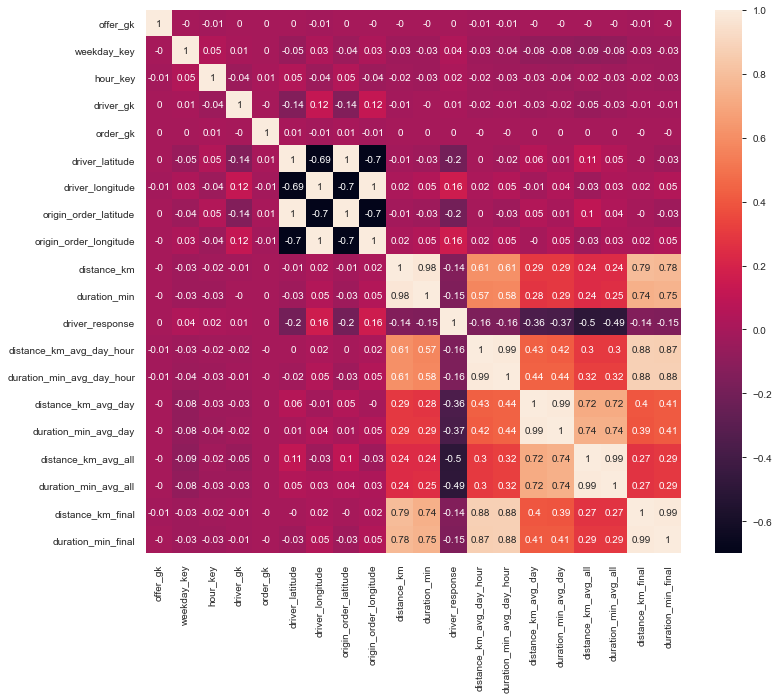

In [86]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

#### Заменили - при этом сохранилась корреляция 0.99 между distance и duration

#### Теперь все хорошо, можем убирать наши вспомогательные столбцы с расстоянием и временем.

In [87]:
data.columns

Index(['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km', 'duration_min',
       'offer_class_group', 'ride_type_desc', 'driver_response',
       'distance_km_avg_day_hour', 'duration_min_avg_day_hour',
       'distance_km_avg_day', 'duration_min_avg_day', 'distance_km_avg_all',
       'duration_min_avg_all', 'distance_km_final', 'duration_min_final'],
      dtype='object')

In [88]:
data.drop(['distance_km', 'duration_min', 'distance_km_avg_day_hour', 'duration_min_avg_day_hour',\
           'distance_km_avg_day','duration_min_avg_day', 'distance_km_avg_all',\
       'duration_min_avg_all'], axis=1, inplace=True)

/Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Наблюдения:
* <s>пустых значений (null) нет</s>
* <s>ширина/долгота - есть значения -1</s>
* ширина/долгота - в последствии будем убирать - очень много различных значений
* <s>distance_km - есть значения -1</s>
* distance_km - есть макс значение очень сильно отличается от 75% квантиля
* <s>duration_min - есть значения -1</s>
* duration_min - есть макс значение очень сильно отличается от 75% квантиля
* <s>offer_class_group - категориальный признак, посмотреть сколько их и как распределены</s>
* offer_class_group - преобразовать с помощью LabelEncoder
* <s>ride_type_desc - категориальный признак, посмотреть сколько их и как распределены</s>
* ride_type_desc - преобразовать с помощью LabelEncoder
* <s>driver_response - првоерить, что значения только 0 или 1</s>
* offer_gk - будем убирать - очень много различных значений
* order_gk - будем убирать - очень много различных значений

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99434 entries, 0 to 99585
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   offer_gk                99434 non-null  int64  
 1   weekday_key             99434 non-null  int64  
 2   hour_key                99434 non-null  int64  
 3   driver_gk               99434 non-null  int64  
 4   order_gk                99434 non-null  int64  
 5   driver_latitude         99434 non-null  float64
 6   driver_longitude        99434 non-null  float64
 7   origin_order_latitude   99434 non-null  float64
 8   origin_order_longitude  99434 non-null  float64
 9   offer_class_group       99434 non-null  object 
 10  ride_type_desc          99434 non-null  object 
 11  driver_response         99434 non-null  int64  
 12  distance_km_final       99434 non-null  float64
 13  duration_min_final      99434 non-null  float64
dtypes: float64(6), int64(6), object(2)
mem

In [90]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk      order_gk  \
count   9.943400e+04  99434.000000  99434.000000  99434.000000   99434.00000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    5.661204e+05      3.158819     13.830792   3445.517067  460938.16437   
std     3.259380e+05      2.054491      7.308187   2038.859766  266072.31176   
min     4.000000e+00      0.000000      0.000000     14.000000      18.00000   
25%     2.854052e+05      1.000000      8.000000   1421.000000  229183.00000   
50%     5.654405e+05      3.000000     16.000000   3506.000000  462559.00000   
75%     8.486612e+05      5.000000     20.000000   5242.000000  691165.50000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.00000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99434.000000      99434.000000           99434.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780826         37.546657              55.780135   
std            0.153845          0.157033               0.156103   
min           55.327636         36.984771              55.327917   
25%           55.709276         37.413497              55.708497   
50%           55.773002         37.533939              55.772594   
75%           55.960707         37.624264              55.962046   
max           56.174097         38.280547              56.172361   

        origin_order_longitude offer_class_group ride_type_desc  \
count             99434.000000             99434          99434   
unique                     NaN                 4              2   
top                        NaN           Economy        private   
freq                       NaN             48226          91031   
mean                 37.546340               NaN            NaN   
std                   0.159872               NaN            NaN   
min                  36.994072               NaN            NaN   
25%                  37.407117               NaN            NaN   
50%                  37.532446               NaN            NaN   
75%                  37.624151               NaN            NaN   
max                  38.243608               NaN            NaN   

        driver_response  distance_km_final  duration_min_final  
count      99434.000000       99434.000000        99434.000000  
unique              NaN                NaN                 NaN  
top                 NaN                NaN                 NaN  
freq                NaN                NaN                 NaN  
mean           0.491703          25.049201           31.529257  
std            0.499934          48.345718           37.304111  
min            0.000000           0.005000            0.017000  
25%            0.000000           8.724000           17.567000  
50%            0.000000          18.290714           27.864889  
75%            1.000000          37.908525           42.743852  
max            1.000000        5234.283000         3958.283000

#### Видно, что строк, у которых расстояние больше 250 (даже не 5000) совсем немного - удалим.

In [95]:
data = data[data.distance_km_final < 250]

In [96]:
data.describe(include='all')

offer_gk   weekday_key      hour_key    driver_gk       order_gk  \
count   9.934800e+04  99348.000000  99348.000000  99348.00000   99348.000000   
unique           NaN           NaN           NaN          NaN            NaN   
top              NaN           NaN           NaN          NaN            NaN   
freq             NaN           NaN           NaN          NaN            NaN   
mean    5.661720e+05      3.158564     13.829428   3445.41408  460938.813283   
std     3.259529e+05      2.054599      7.308901   2038.72754  266056.046762   
min     4.000000e+00      0.000000      0.000000     14.00000      18.000000   
25%     2.854418e+05      1.000000      8.000000   1421.00000  229183.000000   
50%     5.655210e+05      3.000000     16.000000   3507.00000  462556.500000   
75%     8.487502e+05      5.000000     20.000000   5242.00000  691154.500000   
max     1.130355e+06      6.000000     23.000000   6806.00000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99348.000000      99348.000000           99348.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780898         37.546595              55.780208   
std            0.153827          0.157007               0.156085   
min           55.327636         36.984771              55.327917   
25%           55.709283         37.413497              55.708502   
50%           55.773058         37.533869              55.772677   
75%           55.960729         37.624216              55.962065   
max           56.174097         38.280547              56.172361   

        origin_order_longitude offer_class_group ride_type_desc  \
count             99348.000000             99348          99348   
unique                     NaN                 4              2   
top                        NaN           Economy        private   
freq                       NaN             48196          90957   
mean                 37.546274               NaN            NaN   
std                   0.159843               NaN            NaN   
min                  36.994072               NaN            NaN   
25%                  37.407117               NaN            NaN   
50%                  37.532179               NaN            NaN   
75%                  37.624107               NaN            NaN   
max                  38.243608               NaN            NaN   

        driver_response  distance_km_final  duration_min_final  
count      99348.000000       99348.000000        99348.000000  
unique              NaN                NaN                 NaN  
top                 NaN                NaN                 NaN  
freq                NaN                NaN                 NaN  
mean           0.491495          24.168011           30.874254  
std            0.499930          19.076005           17.011494  
min            0.000000           0.005000            0.017000  
25%            0.000000           8.718000           17.550000  
50%            0.000000          18.270000           27.850000  
75%            1.000000          37.828082           42.686032  
max            1.000000         246.137000          199.267000

#### Теперь посмотрим на макс значения distance_km_final	duration_km_final

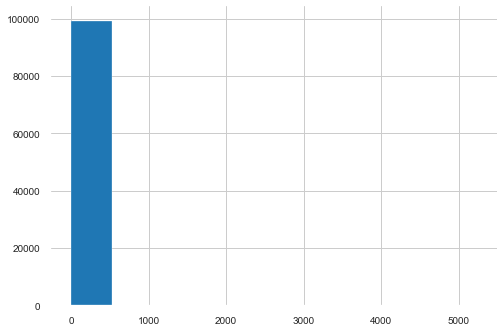

In [91]:
data.distance_km_final.hist()

In [92]:
data.distance_km_final.quantile(0.99)

77.22369999999998

In [93]:
data.distance_km_final.quantile(0.999)

202.88057142857141

In [94]:
data[data.distance_km_final > 250].shape

(86, 14)

#### Видно, что строк, у которых расстояние больше 250 (даже не 5000) совсем немного - удалим.

In [95]:
data = data[data.distance_km_final < 250]

In [96]:
data.describe(include='all')

offer_gk   weekday_key      hour_key    driver_gk       order_gk  \
count   9.934800e+04  99348.000000  99348.000000  99348.00000   99348.000000   
unique           NaN           NaN           NaN          NaN            NaN   
top              NaN           NaN           NaN          NaN            NaN   
freq             NaN           NaN           NaN          NaN            NaN   
mean    5.661720e+05      3.158564     13.829428   3445.41408  460938.813283   
std     3.259529e+05      2.054599      7.308901   2038.72754  266056.046762   
min     4.000000e+00      0.000000      0.000000     14.00000      18.000000   
25%     2.854418e+05      1.000000      8.000000   1421.00000  229183.000000   
50%     5.655210e+05      3.000000     16.000000   3507.00000  462556.500000   
75%     8.487502e+05      5.000000     20.000000   5242.00000  691154.500000   
max     1.130355e+06      6.000000     23.000000   6806.00000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99348.000000      99348.000000           99348.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780898         37.546595              55.780208   
std            0.153827          0.157007               0.156085   
min           55.327636         36.984771              55.327917   
25%           55.709283         37.413497              55.708502   
50%           55.773058         37.533869              55.772677   
75%           55.960729         37.624216              55.962065   
max           56.174097         38.280547              56.172361   

        origin_order_longitude offer_class_group ride_type_desc  \
count             99348.000000             99348          99348   
unique                     NaN                 4              2   
top                        NaN           Economy        private   
freq                       NaN             48196          90957   
mean                 37.546274               NaN            NaN   
std                   0.159843               NaN            NaN   
min                  36.994072               NaN            NaN   
25%                  37.407117               NaN            NaN   
50%                  37.532179               NaN            NaN   
75%                  37.624107               NaN            NaN   
max                  38.243608               NaN            NaN   

        driver_response  distance_km_final  duration_min_final  
count      99348.000000       99348.000000        99348.000000  
unique              NaN                NaN                 NaN  
top                 NaN                NaN                 NaN  
freq                NaN                NaN                 NaN  
mean           0.491495          24.168011           30.874254  
std            0.499930          19.076005           17.011494  
min            0.000000           0.005000            0.017000  
25%            0.000000           8.718000           17.550000  
50%            0.000000          18.270000           27.850000  
75%            1.000000          37.828082           42.686032  
max            1.000000         246.137000          199.267000

#### Теперь посмотрим на мин значения distance_km_final	duration_km_final

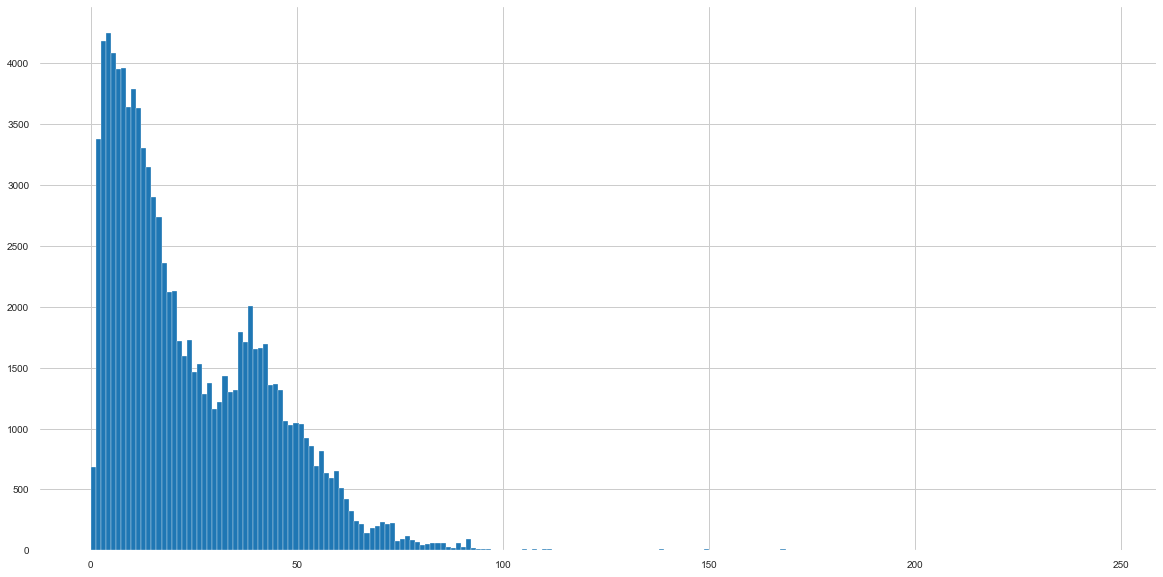

In [101]:
plt.figure(figsize=(20,10))
data.distance_km_final.hist(bins=200)

In [105]:
data.distance_km_final.value_counts().reset_index().sort_values('index')

index  distance_km_final
36946    0.00500                  1
32556    0.01000                  1
4586     0.02000                  5
31541    0.02500                  1
34338    0.03000                  1
...          ...                ...
24052  226.20725                  1
5247   227.88700                  4
19020  230.46000                  2
32700  233.34100                  1
35631  246.13700                  1

[38994 rows x 2 columns]

In [109]:
np.floor(data.distance_km_final).value_counts().reset_index().sort_values('index')

index  distance_km_final
61     0.0                362
15     1.0               2200
3      2.0               3332
1      3.0               3395
0      4.0               3433
..     ...                ...
136  226.0                  1
112  227.0                  4
130  230.0                  2
144  233.0                  1
145  246.0                  1

[152 rows x 2 columns]

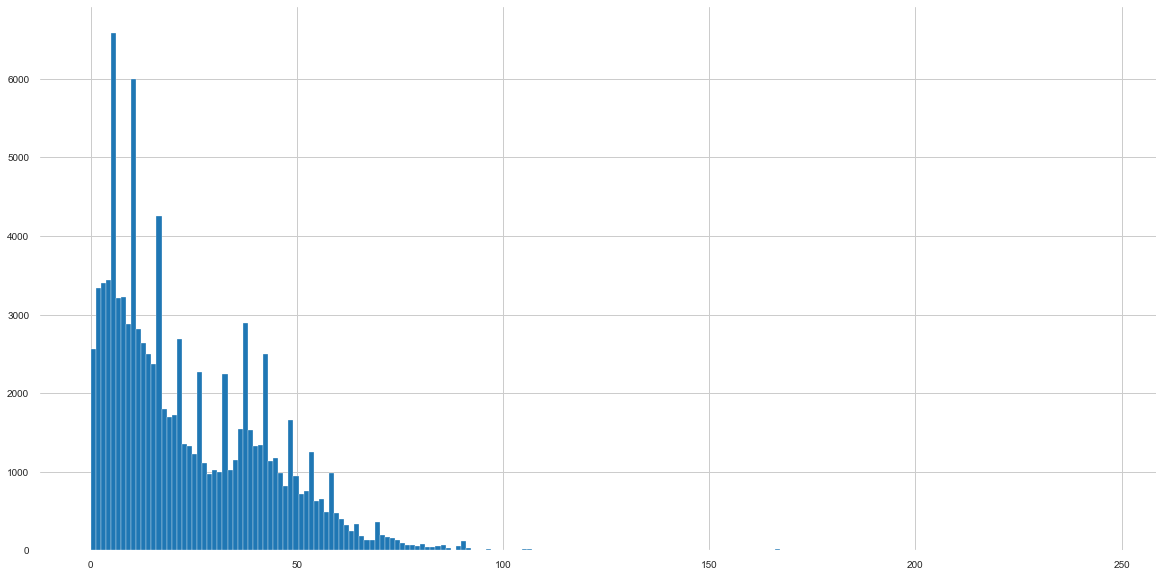

In [111]:
plt.figure(figsize=(20,10))
np.floor(data.distance_km_final).hist(bins=200)

In [112]:
data[data.distance_km_final < 1].shape

(362, 14)

#### Не будем пока удалять

#### Время также резко снизилось (неудивительно - оно коррелирует с расстоянием на 99%)

### Наблюдения:
* <s>пустых значений (null) нет</s>
* <s>ширина/долгота - есть значения -1</s>
* ширина/долгота - в последствии будем убирать - очень много различных значений
* <s>distance_km - есть значения -1</s>
* <s>distance_km - есть макс значение очень сильно отличается от 75% квантиля</s>
* <s>duration_min - есть значения -1</s>
* <s>duration_min - есть макс значение очень сильно отличается от 75% квантиля</s>
* <s>offer_class_group - категориальный признак, посмотреть сколько их и как распределены</s>
* offer_class_group - преобразовать с помощью LabelEncoder
* <s>ride_type_desc - категориальный признак, посмотреть сколько их и как распределены</s>
* ride_type_desc - преобразовать с помощью LabelEncoder
* <s>driver_response - првоерить, что значения только 0 или 1</s>
* offer_gk - будем убирать - очень много различных значений
* order_gk - будем убирать - очень много различных значений

#### Кстати о сильной корреляции расстояния и времени - так их оставлять нельзя, можно посчитать скорость водителя (возможно среднюю скорсоть в принципе)

In [116]:
data['speed'] = round(data.distance_km_final / (data.duration_min_final / 60)).astype(int)

In [117]:
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

  offer_class_group ride_type_desc  driver_response  distance_km_final  \
0           Economy        private                0          13.290786   
1          Standard        private                1          18.802000   
2           Economy        private                0           6.747000   
3           Economy        private                1          17.649500   
4           Economy        private                1          12.383000   

   duration_min_final  speed  
0           20.699929     39  
1           25.217000     45  
2            9.800000     41  
3           25.612500     41  
4           19.250000     39

In [118]:
data.describe(include='all')

offer_gk   weekday_key      hour_key    driver_gk       order_gk  \
count   9.934800e+04  99348.000000  99348.000000  99348.00000   99348.000000   
unique           NaN           NaN           NaN          NaN            NaN   
top              NaN           NaN           NaN          NaN            NaN   
freq             NaN           NaN           NaN          NaN            NaN   
mean    5.661720e+05      3.158564     13.829428   3445.41408  460938.813283   
std     3.259529e+05      2.054599      7.308901   2038.72754  266056.046762   
min     4.000000e+00      0.000000      0.000000     14.00000      18.000000   
25%     2.854418e+05      1.000000      8.000000   1421.00000  229183.000000   
50%     5.655210e+05      3.000000     16.000000   3507.00000  462556.500000   
75%     8.487502e+05      5.000000     20.000000   5242.00000  691154.500000   
max     1.130355e+06      6.000000     23.000000   6806.00000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99348.000000      99348.000000           99348.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780898         37.546595              55.780208   
std            0.153827          0.157007               0.156085   
min           55.327636         36.984771              55.327917   
25%           55.709283         37.413497              55.708502   
50%           55.773058         37.533869              55.772677   
75%           55.960729         37.624216              55.962065   
max           56.174097         38.280547              56.172361   

        origin_order_longitude offer_class_group ride_type_desc  \
count             99348.000000             99348          99348   
unique                     NaN                 4              2   
top                        NaN           Economy        private   
freq                       NaN             48196          90957   
mean                 37.546274               NaN            NaN   
std                   0.159843               NaN            NaN   
min                  36.994072               NaN            NaN   
25%                  37.407117               NaN            NaN   
50%                  37.532179               NaN            NaN   
75%                  37.624107               NaN            NaN   
max                  38.243608               NaN            NaN   

        driver_response  distance_km_final  duration_min_final         speed  
count      99348.000000       99348.000000        99348.000000  99348.000000  
unique              NaN                NaN                 NaN           NaN  
top                 NaN                NaN                 NaN           NaN  
freq                NaN                NaN                 NaN           NaN  
mean           0.491495          24.168011           30.874254     41.007559  
std            0.499930          19.076005           17.011494     14.305132  
min            0.000000           0.005000            0.017000      2.000000  
25%            0.000000           8.718000           17.550000     29.000000  
50%            0.000000          18.270000           27.850000     40.000000  
75%            1.000000          37.828082           42.686032     53.000000  
max            1.000000         246.137000          199.267000     88.000000

#### Из-за того, что у нас были очень маленькие расстояния - получилась очень маленькая скорость на 25 квантиле (2), кажется, что это не очень реально. Посмотрим еще раз на мин расстояния.

In [123]:
data[data.speed < 10].describe(include='all')

offer_gk  weekday_key   hour_key    driver_gk       order_gk  \
count   2.600000e+01    26.000000  26.000000    26.000000      26.000000   
unique           NaN          NaN        NaN          NaN            NaN   
top              NaN          NaN        NaN          NaN            NaN   
freq             NaN          NaN        NaN          NaN            NaN   
mean    5.629593e+05     2.961538  15.000000  3811.807692  419994.307692   
std     2.806825e+05     2.029399   6.858571  2151.951004  275739.362659   
min     9.057600e+04     0.000000   0.000000   426.000000   68128.000000   
25%     3.337855e+05     1.250000  11.250000  1947.250000  181735.000000   
50%     5.768140e+05     2.500000  18.000000  3927.500000  344904.500000   
75%     7.808762e+05     5.000000  20.000000  5512.000000  709033.750000   
max     1.109102e+06     6.000000  23.000000  6792.000000  870684.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count         26.000000         26.000000              26.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.756427         37.565766              55.757454   
std            0.079976          0.158584               0.085791   
min           55.601947         37.284917              55.591991   
25%           55.686172         37.444923              55.686429   
50%           55.759462         37.578932              55.753596   
75%           55.814254         37.675977              55.817113   
max           55.913797         37.861913              55.916623   

        origin_order_longitude offer_class_group ride_type_desc  \
count                26.000000                26             26   
unique                     NaN                 4              2   
top                        NaN          Standard        private   
freq                       NaN                17             24   
mean                 37.562531               NaN            NaN   
std                   0.155414               NaN            NaN   
min                  37.295098               NaN            NaN   
25%                  37.432040               NaN            NaN   
50%                  37.584363               NaN            NaN   
75%                  37.664304               NaN            NaN   
max                  37.861025               NaN            NaN   

        driver_response  distance_km_final  duration_min_final      speed  
count         26.000000          26.000000           26.000000  26.000000  
unique              NaN                NaN                 NaN        NaN  
top                 NaN                NaN                 NaN        NaN  
freq                NaN                NaN                 NaN        NaN  
mean           0.769231           0.391154            2.766038   7.730769  
std            0.429669           0.343057            2.198180   1.563527  
min            0.000000           0.025000            0.250000   2.000000  
25%            1.000000           0.115750            1.191500   8.000000  
50%            1.000000           0.205000            1.550000   8.000000  
75%            1.000000           0.682000            4.917000   8.750000  
max            1.000000           0.951000            6.517000   9.000000

#### Убираю строки, где скорость меньше 10 (это расстояния меньше км)

In [124]:
data = data[data.speed > 9]

In [125]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.932200e+04  99322.000000  99322.000000  99322.000000   99322.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661728e+05      3.158615     13.829121   3445.318167  460949.531524   
std     3.259652e+05      2.054613      7.309023   2038.699892  266054.079434   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854172e+05      1.000000      8.000000   1421.000000  229204.500000   
50%     5.655090e+05      3.000000     16.000000   3506.500000  462559.000000   
75%     8.487568e+05      5.000000     20.000000   5242.000000  691114.500000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99322.000000      99322.000000           99322.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780905         37.546590              55.780214   
std            0.153842          0.157007               0.156099   
min           55.327636         36.984771              55.327917   
25%           55.709285         37.413497              55.708502   
50%           55.773059         37.533861              55.772677   
75%           55.960729         37.624208              55.962067   
max           56.174097         38.280547              56.172361   

        origin_order_longitude offer_class_group ride_type_desc  \
count             99322.000000             99322          99322   
unique                     NaN                 4              2   
top                        NaN           Economy        private   
freq                       NaN             48190          90933   
mean                 37.546270               NaN            NaN   
std                   0.159845               NaN            NaN   
min                  36.994072               NaN            NaN   
25%                  37.407117               NaN            NaN   
50%                  37.532153               NaN            NaN   
75%                  37.624094               NaN            NaN   
max                  38.243608               NaN            NaN   

        driver_response  distance_km_final  duration_min_final         speed  
count      99322.000000       99322.000000        99322.000000  99322.000000  
unique              NaN                NaN                 NaN           NaN  
top                 NaN                NaN                 NaN           NaN  
freq                NaN                NaN                 NaN           NaN  
mean           0.491422          24.174235           30.881612     41.016270  
std            0.499929          19.074621           17.007604     14.296846  
min            0.000000           0.005000            0.017000     10.000000  
25%            0.000000           8.723250           17.567000     29.000000  
50%            0.000000          18.275167           27.850000     40.000000  
75%            1.000000          37.830750           42.700000     53.000000  
max            1.000000         246.137000          199.267000     88.000000

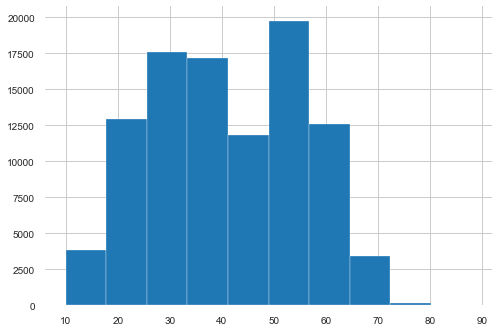

In [126]:
data.speed.hist()

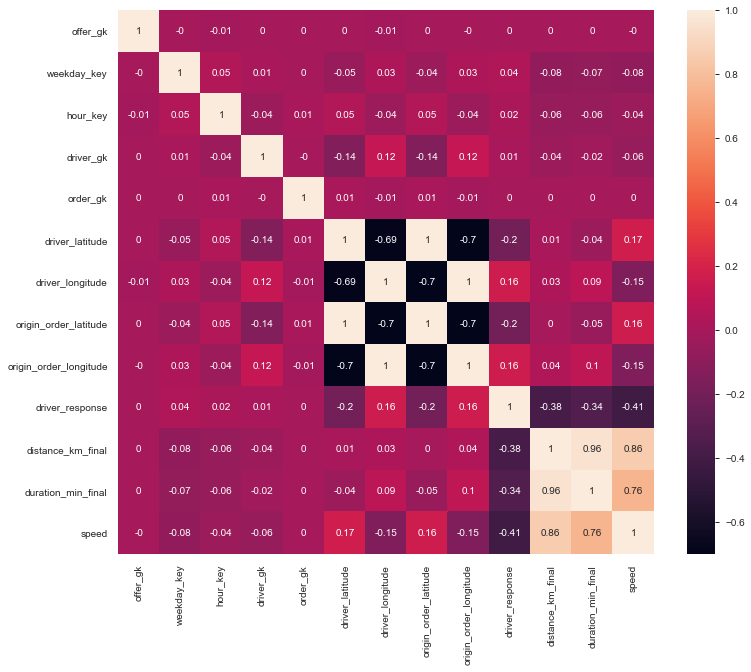

In [127]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

#### В таком виде скорость все равно сильно коррелирует с расстоянием и временем - попробуем сделать среднюю скорость водителя.

In [134]:
data = data.merge(round(data.groupby('driver_gk')['speed'].mean()).astype(int).reset_index(), how='left', 
           left_on=['driver_gk'], right_on=['driver_gk'])

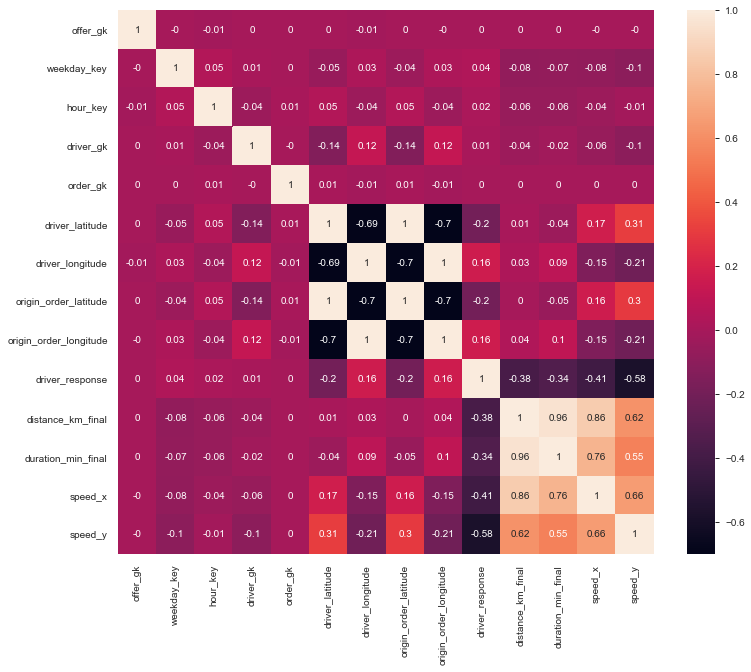

In [135]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

#### Ну вот, корреляция в 62% с расстоянием вполне ок, забавно, что появилась небольшая корреляция с driver_response (обратная))))

#### Убираем speed_x & duration_min_final

In [138]:
data.drop(['duration_min_final', 'speed_x'], axis=1, inplace=True)

In [139]:
data.columns = ['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'offer_class_group', 'ride_type_desc',
       'driver_response', 'distance_km_final', 'speed_avg']

In [140]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.932200e+04  99322.000000  99322.000000  99322.000000   99322.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661728e+05      3.158615     13.829121   3445.318167  460949.531524   
std     3.259652e+05      2.054613      7.309023   2038.699892  266054.079434   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854172e+05      1.000000      8.000000   1421.000000  229204.500000   
50%     5.655090e+05      3.000000     16.000000   3506.500000  462559.000000   
75%     8.487568e+05      5.000000     20.000000   5242.000000  691114.500000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99322.000000      99322.000000           99322.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780905         37.546590              55.780214   
std            0.153842          0.157007               0.156099   
min           55.327636         36.984771              55.327917   
25%           55.709285         37.413497              55.708502   
50%           55.773059         37.533861              55.772677   
75%           55.960729         37.624208              55.962067   
max           56.174097         38.280547              56.172361   

        origin_order_longitude offer_class_group ride_type_desc  \
count             99322.000000             99322          99322   
unique                     NaN                 4              2   
top                        NaN           Economy        private   
freq                       NaN             48190          90933   
mean                 37.546270               NaN            NaN   
std                   0.159845               NaN            NaN   
min                  36.994072               NaN            NaN   
25%                  37.407117               NaN            NaN   
50%                  37.532153               NaN            NaN   
75%                  37.624094               NaN            NaN   
max                  38.243608               NaN            NaN   

        driver_response  distance_km_final     speed_avg  
count      99322.000000       99322.000000  99322.000000  
unique              NaN                NaN           NaN  
top                 NaN                NaN           NaN  
freq                NaN                NaN           NaN  
mean           0.491422          24.174235     41.044250  
std            0.499929          19.074621      9.411989  
min            0.000000           0.005000     24.000000  
25%            0.000000           8.723250     33.000000  
50%            0.000000          18.275167     36.000000  
75%            1.000000          37.830750     53.000000  
max            1.000000         246.137000     55.000000

### Теперь хочу построить новый атрибут - рассточние между водителем (driver_latitude и driver_longitude) и фактическим местом ожидания (origin_order_latitude и origin_order_longitude).

In [141]:
import math

def distance(lat1, lon1, lat2, lon2):
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [142]:
data['distance_between_taxi_n_client'] = data.apply(lambda x: distance(x['origin_order_latitude']\
                                                                       , x['origin_order_longitude']\
                                             , x['driver_latitude'],\
                                             x['driver_longitude']), axis=1)

In [143]:
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

  offer_class_group ride_type_desc  driver_response  distance_km_final  \
0           Economy        private                0          13.290786   
1          Standard        private                1          18.802000   
2           Economy        private                0           6.747000   
3           Economy        private                1          17.649500   
4           Economy        private                1          12.383000   

   speed_avg  distance_between_taxi_n_client  
0         36                        1.363045  
1         36                        3.413092  
2         36                        0.409999  
3         36                        0.647472  
4         36                        1.062481

In [144]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.932200e+04  99322.000000  99322.000000  99322.000000   99322.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661728e+05      3.158615     13.829121   3445.318167  460949.531524   
std     3.259652e+05      2.054613      7.309023   2038.699892  266054.079434   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854172e+05      1.000000      8.000000   1421.000000  229204.500000   
50%     5.655090e+05      3.000000     16.000000   3506.500000  462559.000000   
75%     8.487568e+05      5.000000     20.000000   5242.000000  691114.500000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99322.000000      99322.000000           99322.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780905         37.546590              55.780214   
std            0.153842          0.157007               0.156099   
min           55.327636         36.984771              55.327917   
25%           55.709285         37.413497              55.708502   
50%           55.773059         37.533861              55.772677   
75%           55.960729         37.624208              55.962067   
max           56.174097         38.280547              56.172361   

        origin_order_longitude offer_class_group ride_type_desc  \
count             99322.000000             99322          99322   
unique                     NaN                 4              2   
top                        NaN           Economy        private   
freq                       NaN             48190          90933   
mean                 37.546270               NaN            NaN   
std                   0.159845               NaN            NaN   
min                  36.994072               NaN            NaN   
25%                  37.407117               NaN            NaN   
50%                  37.532153               NaN            NaN   
75%                  37.624094               NaN            NaN   
max                  38.243608               NaN            NaN   

        driver_response  distance_km_final     speed_avg  \
count      99322.000000       99322.000000  99322.000000   
unique              NaN                NaN           NaN   
top                 NaN                NaN           NaN   
freq                NaN                NaN           NaN   
mean           0.491422          24.174235     41.044250   
std            0.499929          19.074621      9.411989   
min            0.000000           0.005000     24.000000   
25%            0.000000           8.723250     33.000000   
50%            0.000000          18.275167     36.000000   
75%            1.000000          37.830750     53.000000   
max            1.000000         246.137000     55.000000   

        distance_between_taxi_n_client  
count                     99322.000000  
unique                             NaN  
top                                NaN  
freq                               NaN  
mean                          0.987950  
std                           0.947242  
min                           0.000000  
25%                           0.404335  
50%                           0.652057  
75%                           1.316194  
max                          22.293496

#### По расстоянию сразу видно, что есть какие-то мало реалистичные случаи - такси на расстоянии 22 км от заказчика:

In [160]:
data[data.distance_between_taxi_n_client > 7].shape

(41, 15)

In [161]:
data = data[data.distance_between_taxi_n_client < 8]

In [162]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.930600e+04  99306.000000  99306.000000  99306.000000   99306.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661737e+05      3.158611     13.829628   3445.355819  460944.266429   
std     3.259671e+05      2.054547      7.309018   2038.743936  266054.208954   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854172e+05      1.000000      8.000000   1421.000000  229204.500000   
50%     5.655090e+05      3.000000     16.000000   3507.000000  462556.500000   
75%     8.487638e+05      5.000000     20.000000   5242.000000  691092.250000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99306.000000      99306.000000           99306.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780910         37.546588              55.780220   
std            0.153845          0.157010               0.156100   
min           55.327636         36.984771              55.327917   
25%           55.709289         37.413497              55.708502   
50%           55.773060         37.533854              55.772677   
75%           55.960729         37.624218              55.962067   
max           56.174097         38.280547              56.172361   

        origin_order_longitude offer_class_group ride_type_desc  \
count             99306.000000             99306          99306   
unique                     NaN                 4              2   
top                        NaN           Economy        private   
freq                       NaN             48185          90919   
mean                 37.546269               NaN            NaN   
std                   0.159850               NaN            NaN   
min                  36.994072               NaN            NaN   
25%                  37.407117               NaN            NaN   
50%                  37.532153               NaN            NaN   
75%                  37.624102               NaN            NaN   
max                  38.243608               NaN            NaN   

        driver_response  distance_km_final     speed_avg  \
count      99306.000000       99306.000000  99306.000000   
unique              NaN                NaN           NaN   
top                 NaN                NaN           NaN   
freq                NaN                NaN           NaN   
mean           0.491431          24.173623     41.044116   
std            0.499929          19.074288      9.412176   
min            0.000000           0.005000     24.000000   
25%            0.000000           8.723000     33.000000   
50%            0.000000          18.275000     36.000000   
75%            1.000000          37.832500     53.000000   
max            1.000000         246.137000     55.000000   

        distance_between_taxi_n_client  
count                     99306.000000  
unique                             NaN  
top                                NaN  
freq                               NaN  
mean                          0.986175  
std                           0.935738  
min                           0.000000  
25%                           0.404335  
50%                           0.651890  
75%                           1.315783  
max                           7.818044

#### Теперь возьмем макс широту и долготу заказа, на которую соглашается каждый водитель.
##### Пока не буду это прикреплять к данным - оставим на всякий случай

In [169]:
# order_area_stat = 
data.groupby('driver_gk')['origin_order_latitude', 'origin_order_longitude'].agg(['min', 'max'])

/Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


origin_order_latitude            origin_order_longitude           
                            min        max                    min        max
driver_gk                                                                   
14                    55.408786  55.930474              37.286083  37.906314
22                    55.605226  55.918241              37.286083  37.704232
42                    55.544174  55.927439              37.306868  38.027641
51                    55.509223  55.926059              37.334061  37.870910
75                    55.410307  55.966694              37.236142  37.902451
...                         ...        ...                    ...        ...
6762                  55.410307  55.973648              37.286083  37.902451
6792                  55.408786  55.966244              37.228948  38.116847
6800                  55.410307  55.996908              37.084226  37.902451
6802                  55.410307  55.972642              37.414589  37.902451
6806                  55.410307  55.962322              37.042117  37.917963

[439 rows x 4 columns]

#### Сделаем анализ по полигонам - какую площадь охватывает таксист

In [214]:
data['orig_coordinates'] = data[['origin_order_latitude', 'origin_order_longitude']].values.tolist()

/Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

  offer_class_group ride_type_desc  driver_response  distance_km_final  \
0           Economy        private                0          13.290786   
1          Standard        private                1          18.802000   
2           Economy        private                0           6.747000   
3           Economy        private                1          17.649500   
4           Economy        private                1          12.383000   

   speed_avg  distance_between_taxi_n_client        orig_coordinates  
0         36                        1.363045   [55.814567, 37.35501]  
1         36                        3.413092  [55.819329, 37.466398]  
2         36                        0.409999  [55.814827, 37.354074]  
3         36                        0.647472   [55.743469, 37.43113]  
4         36                        1.062481  [55.812559, 37.527407]

In [219]:
data.reset_index(drop=True, inplace=True)

In [226]:
driver_coord_stat = data.sort_values('orig_coordinates').groupby('driver_gk')[['orig_coordinates']]\
  .agg(lambda x: x[x != 0].tolist())\
  .reset_index()

In [227]:
driver_coord_stat.head()

driver_gk                                   orig_coordinates
0         14  [[55.408786, 37.906314], [55.410307, 37.902451...
1         22  [[55.605226, 37.28608300000001], [55.605808, 3...
2         42  [[55.544174, 37.55866], [55.569959, 37.578682]...
3         51  [[55.509223, 37.780307], [55.585374, 37.72266]...
4         75  [[55.410307, 37.902451], [55.410307, 37.902451...

In [228]:
from area import area

In [229]:
def create_coord_area(my_list):
    obj = {'type':'Polygon','coordinates':[my_list]}
    area_m2 = area(obj)
    area_km2 = area_m2 / 1e+6
    return area_km2

In [230]:
driver_coord_stat['polygon_area'] = driver_coord_stat.orig_coordinates.apply(create_coord_area)

In [231]:
driver_coord_stat

driver_gk                                   orig_coordinates  \
0           14  [[55.408786, 37.906314], [55.410307, 37.902451...   
1           22  [[55.605226, 37.28608300000001], [55.605808, 3...   
2           42  [[55.544174, 37.55866], [55.569959, 37.578682]...   
3           51  [[55.509223, 37.780307], [55.585374, 37.72266]...   
4           75  [[55.410307, 37.902451], [55.410307, 37.902451...   
..         ...                                                ...   
434       6762  [[55.410307, 37.902451], [55.410307, 37.902451...   
435       6792  [[55.408786, 37.906314], [55.408786, 37.906314...   
436       6800  [[55.410307, 37.902451], [55.410307, 37.902451...   
437       6802  [[55.410307, 37.902451], [55.410307, 37.902451...   
438       6806  [[55.410307, 37.902451], [55.410307, 37.902451...   

     polygon_area  
0      336.289813  
1      464.512836  
2      543.244518  
3      559.548097  
4      389.501205  
..            ...  
434    491.228987  
435     56.304466  
436    588.161051  
437    287.862607  
438    309.354368  

[439 rows x 3 columns]

In [234]:
driver_coord_stat['polygon_area'] = driver_coord_stat.polygon_area.astype(int)

In [237]:
data = data.merge(driver_coord_stat, how='left', left_on='driver_gk', right_on='driver_gk')

In [238]:
data.shape

(99306, 18)

In [244]:
data_coord = data[['driver_gk', 'orig_coordinates_x', 'orig_coordinates_y']]

In [245]:
data.drop(['orig_coordinates_x', 'orig_coordinates_y'], axis=1, inplace=True)

In [246]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.930600e+04  99306.000000  99306.000000  99306.000000   99306.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661737e+05      3.158611     13.829628   3445.355819  460944.266429   
std     3.259671e+05      2.054547      7.309018   2038.743936  266054.208954   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854172e+05      1.000000      8.000000   1421.000000  229204.500000   
50%     5.655090e+05      3.000000     16.000000   3507.000000  462556.500000   
75%     8.487638e+05      5.000000     20.000000   5242.000000  691092.250000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

        driver_latitude  driver_longitude  origin_order_latitude  \
count      99306.000000      99306.000000           99306.000000   
unique              NaN               NaN                    NaN   
top                 NaN               NaN                    NaN   
freq                NaN               NaN                    NaN   
mean          55.780910         37.546588              55.780220   
std            0.153845          0.157010               0.156100   
min           55.327636         36.984771              55.327917   
25%           55.709289         37.413497              55.708502   
50%           55.773060         37.533854              55.772677   
75%           55.960729         37.624218              55.962067   
max           56.174097         38.280547              56.172361   

        origin_order_longitude offer_class_group ride_type_desc  \
count             99306.000000             99306          99306   
unique                     NaN                 4              2   
top                        NaN           Economy        private   
freq                       NaN             48185          90919   
mean                 37.546269               NaN            NaN   
std                   0.159850               NaN            NaN   
min                  36.994072               NaN            NaN   
25%                  37.407117               NaN            NaN   
50%                  37.532153               NaN            NaN   
75%                  37.624102               NaN            NaN   
max                  38.243608               NaN            NaN   

        driver_response  distance_km_final     speed_avg  \
count      99306.000000       99306.000000  99306.000000   
unique              NaN                NaN           NaN   
top                 NaN                NaN           NaN   
freq                NaN                NaN           NaN   
mean           0.491431          24.173623     41.044116   
std            0.499929          19.074288      9.412176   
min            0.000000           0.005000     24.000000   
25%            0.000000           8.723000     33.000000   
50%            0.000000          18.275000     36.000000   
75%            1.000000          37.832500     53.000000   
max            1.000000         246.137000     55.000000   

        distance_between_taxi_n_client  polygon_area  
count                     99306.000000  99306.000000  
unique                             NaN           NaN  
top                                NaN           NaN  
freq                               NaN           NaN  
mean                          0.986175    343.559120  
std                           0.935738    316.059783  
min                           0.000000      2.000000  
25%                           0.404335    100.000000  
50%                           0.651890    248.000000  
75%                           1.315783    517.250000  
max                           7.818044   1777.000000

#### Можно убирать координаты

In [248]:
data.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude','origin_order_longitude']\
          , axis=1, inplace=True)

In [249]:
data.describe(include='all')

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count   9.930600e+04  99306.000000  99306.000000  99306.000000   99306.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    5.661737e+05      3.158611     13.829628   3445.355819  460944.266429   
std     3.259671e+05      2.054547      7.309018   2038.743936  266054.208954   
min     4.000000e+00      0.000000      0.000000     14.000000      18.000000   
25%     2.854172e+05      1.000000      8.000000   1421.000000  229204.500000   
50%     5.655090e+05      3.000000     16.000000   3507.000000  462556.500000   
75%     8.487638e+05      5.000000     20.000000   5242.000000  691092.250000   
max     1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

       offer_class_group ride_type_desc  driver_response  distance_km_final  \
count              99306          99306     99306.000000       99306.000000   
unique                 4              2              NaN                NaN   
top              Economy        private              NaN                NaN   
freq               48185          90919              NaN                NaN   
mean                 NaN            NaN         0.491431          24.173623   
std                  NaN            NaN         0.499929          19.074288   
min                  NaN            NaN         0.000000           0.005000   
25%                  NaN            NaN         0.000000           8.723000   
50%                  NaN            NaN         0.000000          18.275000   
75%                  NaN            NaN         1.000000          37.832500   
max                  NaN            NaN         1.000000         246.137000   

           speed_avg  distance_between_taxi_n_client  polygon_area  
count   99306.000000                    99306.000000  99306.000000  
unique           NaN                             NaN           NaN  
top              NaN                             NaN           NaN  
freq             NaN                             NaN           NaN  
mean       41.044116                        0.986175    343.559120  
std         9.412176                        0.935738    316.059783  
min        24.000000                        0.000000      2.000000  
25%        33.000000                        0.404335    100.000000  
50%        36.000000                        0.651890    248.000000  
75%        53.000000                        1.315783    517.250000  
max        55.000000                        7.818044   1777.000000

#### Проверим поля offer_gk и order_gk

In [251]:
data[data.offer_gk == data.order_gk]

Empty DataFrame
Columns: [offer_gk, weekday_key, hour_key, driver_gk, order_gk, offer_class_group, ride_type_desc, driver_response, distance_km_final, speed_avg, distance_between_taxi_n_client, polygon_area]
Index: []

In [252]:
len(data.offer_gk.unique())

99306

In [253]:
len(data.order_gk.unique())

80836

#### offer_gk явно некий id заказа, он уникальный и его можно убрать, дальше смотрим только на order_gk

In [258]:
order_gk_stat = data.order_gk.value_counts().reset_index()
order_gk_stat.columns = ['order_gk', 'num_of_order_gk']

In [262]:
order_gk_stat[order_gk_stat.num_of_order_gk > 10]

order_gk  num_of_order_gk
0     853342               14
1     714527               13
2     761031               13
3     341619               12
4     181958               12
5     187673               12
6     896087               12
7     828548               12
8     180487               12
9     676695               11
10    323136               11
11    779642               11
12    517969               11
13    574575               11
14    916131               11
15     36067               11
16    676624               11

In [265]:
data[data.order_gk.isin(order_gk_stat[order_gk_stat.num_of_order_gk > 10].order_gk)].sort_values('order_gk')\
.head(14)

offer_gk  weekday_key  hour_key  driver_gk  order_gk offer_class_group  \
30734     42623            0         0       5917     36067           Economy   
32309    219314            0         0       6762     36067           Economy   
25420    253551            0         0       4100     36067           Economy   
17150    747849            0         0       5718     36067           Economy   
97632     77367            0         0       6302     36067           Economy   
40942    228625            0         0       1421     36067           Economy   
26563    525855            0         0       1793     36067           Economy   
24094    723627            0         0       2236     36067           Economy   
88673    768614            0         0       1358     36067           Economy   
29854    506165            0         0       1060     36067           Economy   
70499    890466            0         0       4490     36067           Economy   
13338    696861            3         2       2291    180487           Economy   
38510   1093694            3         2       1421    180487           Economy   
41240   1110320            3         2       1537    180487           Economy   

      ride_type_desc  driver_response  distance_km_final  speed_avg  \
30734        private                0            44.7130         55   
32309        private                0            44.7130         54   
25420        private                0            44.7130         55   
17150        private                0            44.7130         50   
97632        private                0            44.7130         54   
40942        private                0            44.7130         55   
26563        private                0            44.7130         53   
24094        private                0            44.7130         54   
88673        private                0            44.7130         54   
29854        private                0            44.7130         54   
70499        private                0            44.7130         53   
13338       business                0            57.1690         53   
38510       business                0            48.5850         55   
41240       business                0            46.8682         55   

       distance_between_taxi_n_client  polygon_area  
30734                        0.000111            15  
32309                        0.491546           491  
25420                        0.397963             2  
17150                        0.000000            43  
97632                        0.491119           718  
40942                        0.404462           165  
26563                        0.147761           656  
24094                        0.000222           691  
88673                        0.491611            28  
29854                        0.051486           130  
70499                        0.167618           653  
13338                        0.491468           813  
38510                        0.413181           165  
41240                        0.491634           187

#### Сделаем новый атрибут - макс кол-во заказов на водителя

In [267]:
data = data.merge(order_gk_stat, how='left', left_on='order_gk', right_on='order_gk')

In [268]:
data.drop(['order_gk', 'offer_gk'], axis=1, inplace=True)

In [269]:
data.describe(include='all')

weekday_key      hour_key     driver_gk offer_class_group  \
count   99306.000000  99306.000000  99306.000000             99306   
unique           NaN           NaN           NaN                 4   
top              NaN           NaN           NaN           Economy   
freq             NaN           NaN           NaN             48185   
mean        3.158611     13.829628   3445.355819               NaN   
std         2.054547      7.309018   2038.743936               NaN   
min         0.000000      0.000000     14.000000               NaN   
25%         1.000000      8.000000   1421.000000               NaN   
50%         3.000000     16.000000   3507.000000               NaN   
75%         5.000000     20.000000   5242.000000               NaN   
max         6.000000     23.000000   6806.000000               NaN   

       ride_type_desc  driver_response  distance_km_final     speed_avg  \
count           99306     99306.000000       99306.000000  99306.000000   
unique              2              NaN                NaN           NaN   
top           private              NaN                NaN           NaN   
freq            90919              NaN                NaN           NaN   
mean              NaN         0.491431          24.173623     41.044116   
std               NaN         0.499929          19.074288      9.412176   
min               NaN         0.000000           0.005000     24.000000   
25%               NaN         0.000000           8.723000     33.000000   
50%               NaN         0.000000          18.275000     36.000000   
75%               NaN         1.000000          37.832500     53.000000   
max               NaN         1.000000         246.137000     55.000000   

        distance_between_taxi_n_client  polygon_area  num_of_order_gk  
count                     99306.000000  99306.000000     99306.000000  
unique                             NaN           NaN              NaN  
top                                NaN           NaN              NaN  
freq                               NaN           NaN              NaN  
mean                          0.986175    343.559120         1.762270  
std                           0.935738    316.059783         1.599984  
min                           0.000000      2.000000         1.000000  
25%                           0.404335    100.000000         1.000000  
50%                           0.651890    248.000000         1.000000  
75%                           1.315783    517.250000         2.000000  
max                           7.818044   1777.000000        14.000000

200


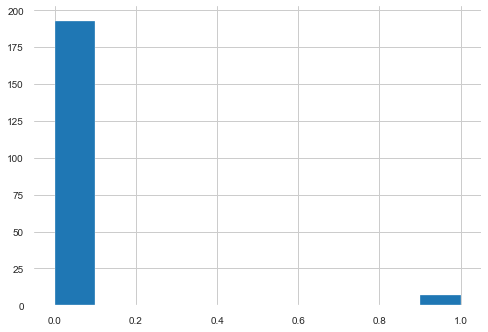

In [281]:
print(len(data[data.num_of_order_gk > 10]))
data[data.num_of_order_gk > 10].driver_response.hist()

#### Записей с дублирующимися order_gk мало и они почти однозначно указывают на 0 driver_response - уберем их.

In [282]:
data = data[data.num_of_order_gk < 10]

In [283]:
data.describe(include='all')

weekday_key      hour_key     driver_gk offer_class_group  \
count   98906.000000  98906.000000  98906.000000             98906   
unique           NaN           NaN           NaN                 4   
top              NaN           NaN           NaN           Economy   
freq             NaN           NaN           NaN             47966   
mean        3.161911     13.824975   3446.424150               NaN   
std         2.053816      7.292310   2038.858602               NaN   
min         0.000000      0.000000     14.000000               NaN   
25%         1.000000      8.000000   1421.000000               NaN   
50%         3.000000     16.000000   3507.000000               NaN   
75%         5.000000     20.000000   5242.000000               NaN   
max         6.000000     23.000000   6806.000000               NaN   

       ride_type_desc  driver_response  distance_km_final     speed_avg  \
count           98906     98906.000000       98906.000000  98906.000000   
unique              2              NaN                NaN           NaN   
top           private              NaN                NaN           NaN   
freq            90531              NaN                NaN           NaN   
mean              NaN         0.493307          24.118039     40.997290   
std               NaN         0.499958          19.067241      9.398401   
min               NaN         0.000000           0.005000     24.000000   
25%               NaN         0.000000           8.703437     33.000000   
50%               NaN         0.000000          18.213500     36.000000   
75%               NaN         1.000000          37.687265     53.000000   
max               NaN         1.000000         246.137000     55.000000   

        distance_between_taxi_n_client  polygon_area  num_of_order_gk  
count                     98906.000000  98906.000000     98906.000000  
unique                             NaN           NaN              NaN  
top                                NaN           NaN              NaN  
freq                               NaN           NaN              NaN  
mean                          0.988708    343.750571         1.725254  
std                           0.936601    316.142449         1.491672  
min                           0.000000      2.000000         1.000000  
25%                           0.404392    100.000000         1.000000  
50%                           0.655360    248.000000         1.000000  
75%                           1.319787    515.000000         2.000000  
max                           7.818044   1777.000000         9.000000

In [284]:
data.profile_report()

#### Выглядит отлично))) Начинаем предсказывать)

In [285]:
le = LabelEncoder()

In [286]:
data_clean = pd.DataFrame(data)

In [287]:
data['offer_class_group'] = le.fit_transform(data.offer_class_group)
data['ride_type_desc'] = le.fit_transform(data.ride_type_desc)

In [288]:
X = data.drop(['driver_response'], axis=1)
y = data.driver_response

In [289]:
stand_scaler = StandardScaler()
X = pd.DataFrame(stand_scaler.fit_transform(X), columns=X.columns)
X.head()

weekday_key  hour_key  driver_gk  offer_class_group  ride_type_desc  \
0     0.894967  0.846790   1.291698          -1.005171        0.304154   
1     0.894967  0.024001   1.291698           1.035040        0.304154   
2     1.381868  0.024001   1.291698          -1.005171        0.304154   
3    -0.565736 -1.073050   1.291698          -1.005171        0.304154   
4     0.408066  0.298264   1.291698          -1.005171        0.304154   

   distance_km_final  speed_avg  distance_between_taxi_n_client  polygon_area  \
0          -0.567849   -0.53172                        0.399678      0.864328   
1          -0.278806   -0.53172                        2.588505      0.864328   
2          -0.911046   -0.53172                       -0.617885      0.864328   
3          -0.339251   -0.53172                       -0.364336      0.864328   
4          -0.615459   -0.53172                        0.078768      0.864328   

   num_of_order_gk  
0         0.184187  
1        -0.486205  
2        -0.486205  
3        -0.486205  
4        -0.486205

In [292]:
from sklearn import model_selection

X_train, X_test, y_train, y_test  = model_selection.train_test_split(X, y, test_size = 0.2)
#                                                                       , random_state = 42, stratify = y)

In [293]:
from sklearn.model_selection import RandomizedSearchCV#RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [294]:
# model = RandomForestClassifier(n_jobs = -1, random_state=42)
model = RandomForestClassifier()

In [295]:
# param_grid = {'n_estimators': [10,20,30,40,50,100,200,250,300,350,400]}
param_grid = {'n_estimators': [10,30,50,100,300]}

In [296]:
random_search = RandomizedSearchCV(model, param_grid)

In [297]:
random_search.fit(X_train, y_train)

/Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [298]:
print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [299]:
predicted = random_search.predict(X_test)
predicted_log = random_search.predict_proba(X_test)
train_predict = random_search.predict(X_train)

In [300]:
from sklearn.metrics import accuracy_score, log_loss, mean_absolute_error
print("Accuracy score is: ", accuracy_score(y_test, predicted)) #calculate accuracy score
print("Log_loss score is: ", log_loss(y_test, predicted_log))   #calculate log loss score
print("Test MAE score is: ", mean_absolute_error(y_test, predicted))   #calculate log loss score
print(f'Train MAE score is:  {mean_absolute_error(train_predict, y_train)}')

Accuracy score is:  0.8439995955919523
Log_loss score is:  0.3880092575049438
Test MAE score is:  0.15600040440804772
Train MAE score is:  0.0017693746524442646


In [302]:
model = RandomForestClassifier(n_estimators=random_search.best_estimator_.n_estimators)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [303]:
model.feature_importances_

array([0.04718478, 0.07991046, 0.08989049, 0.02399279, 0.00745426,
       0.17163854, 0.23586299, 0.13247963, 0.09341797, 0.1181681 ])

In [305]:
list(X)

['weekday_key',
 'hour_key',
 'driver_gk',
 'offer_class_group',
 'ride_type_desc',
 'distance_km_final',
 'speed_avg',
 'distance_between_taxi_n_client',
 'polygon_area',
 'num_of_order_gk']

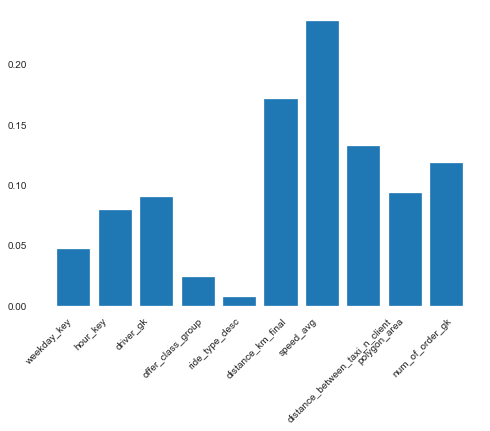

In [315]:
inds = range(len(model.feature_importances_))   
fig,ax = plt.subplots()                          
rects = ax.bar(inds, model.feature_importances_) 
ax.set_xticks([ind-0.6 for ind in inds])         
ax.set_xticklabels(list(X))               
locs, labels = plt.xticks(); plt.setp(labels, rotation=45)
plt.show()

In [360]:
df_pred = pd.DataFrame(predicted.reshape(19782, 1))
df_pred.columns = ['pred']

In [364]:
my_X = pd.DataFrame(X_test)

In [373]:
my_X.reset_index(inplace=True)

In [368]:
my_X = my_X.merge(df_pred, left_index=True, right_index=True)

In [369]:
my_test = data[data.index.isin(my_X['index'])].merge(my_X, left_index=True, right_on='index')

In [370]:
my_test

weekday_key_x  hour_key_x  driver_gk_x  offer_class_group_x  \
18203              5          20         6080                    0   
14825              4          12         6080                    3   
8778               6           9         6080                    0   
18813              4           8         6080                    3   
13611              6          16         6080                    0   
...              ...         ...          ...                  ...   
17003              5           0         2442                    3   
17514              6          23         2442                    3   
11970              0          14         2442                    3   
7843               0           3         2442                    3   
1438               5          20         2442                    3   

       ride_type_desc_x  driver_response  distance_km_final_x  speed_avg_x  \
18203                 1                0                1.517           36   
14825                 0                0               24.919           36   
8778                  1                1                3.772           36   
18813                 1                1               17.649           36   
13611                 1                1               17.333           36   
...                 ...              ...                  ...          ...   
17003                 1                0               33.541           53   
17514                 1                0               43.300           53   
11970                 1                0               48.646           53   
7843                  1                1               22.142           53   
1438                  1                0               35.137           53   

       distance_between_taxi_n_client_x  polygon_area_x  num_of_order_gk_x  \
18203                          3.449065             617                  1   
14825                          0.628258             617                  1   
8778                           0.979597             617                  1   
18813                          1.781443             617                  1   
13611                          0.929975             617                  1   
...                                 ...             ...                ...   
17003                          0.433597               2                  1   
17514                          0.415154               2                  4   
11970                          0.620346               2                  2   
7843                           0.046760               2                  1   
1438                           0.397078               2                  1   

       level_0  index  weekday_key_y  hour_key_y  driver_gk_y  \
18203    18203      7       0.894967    0.846790     1.291698   
14825    14825     21       0.408066   -0.250261     1.291698   
8778      8778     24       1.381868   -0.661656     1.291698   
18813    18813     30       0.408066   -0.798787     1.291698   
13611    13611     35       1.381868    0.298264     1.291698   
...        ...    ...            ...         ...          ...   
17003    17003  98888       0.894967    0.435396    -0.492643   
17514    17514  98894      -1.539538    0.709659    -0.492643   
11970    11970  98897      -1.539538    1.258184    -0.492643   
7843      7843  98899       0.894967    0.983922    -0.492643   
1438      1438  98903      -1.052637    0.846790    -0.492643   

       offer_class_group_y  ride_type_desc_y  distance_km_final_y  \
18203            -1.005171          0.304154            -1.185339   
14825             1.035040         -3.287807             0.042007   
8778             -1.005171          0.304154            -1.067073   
18813             1.035040          0.304154            -0.339277   
13611            -1.005171          0.304154            -0.355850   
...                    ...               ...                  ...   
17003            -1.005171  

In [371]:
my_test['check'] = np.abs(my_test.pred - my_test.driver_response)

In [372]:
sum(my_test.check)/len(my_test)

0.29938083637840035

In [319]:
data.head()

weekday_key  hour_key  driver_gk  offer_class_group  ride_type_desc  \
0            5        20       6080                  0               1   
1            5        14       6080                  3               1   
2            6        14       6080                  0               1   
3            2         6       6080                  0               1   
4            4        16       6080                  0               1   

   driver_response  distance_km_final  speed_avg  \
0                0          13.290786         36   
1                1          18.802000         36   
2                0           6.747000         36   
3                1          17.649500         36   
4                1          12.383000         36   

   distance_between_taxi_n_client  polygon_area  num_of_order_gk  
0                        1.363045           617                2  
1                        3.413092           617                1  
2                        0.409999           617                1  
3                        0.647472           617                1  
4                        1.062481           617                1

#### Теперь попробуем с XGBoost

In [374]:
import xgboost as xgb

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/d.kolesova/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


#### пишут, что на маке нельзя(((